<span style="font-size:large;">
<div style="text-align: right">IM-UH 1511 <b>Introduction to Digital
Humanities</b><br/>
<div style="text-align: right"><b>Final Project</b><br/>
Student name: <span style="color:blue"><b>Adham Chakohi</b></span><br/>

# <span style="color:green">Discography of Kanye West, Kid Cudi, Jay-Z and their Rap Supergroups <i>Kids See Ghosts</i> and <i>The Throne</i></span>
## <span style="color:red">2. Topic Modeling of Lyrics</span>

In [1]:
import urllib, os, codecs, random, operator, re, string, copy, dateutil.parser, itertools, pickle, datetime, math, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, networkx as nx
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from collections import Counter
from string import punctuation, digits
import pathlib
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_lg')
import inflect
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.stem.porter import *
stemmer = PorterStemmer()
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from chord import Chord
from IPython.display import IFrame

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
from gensim.corpora import Dictionary
import pyLDAvis
from pyLDAvis import gensim as pgensim
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.simplefilter('ignore')

### Loading Data

In [2]:
with open('The_Throne_and_Kids_See_Ghosts_Lyrics.pic', 'rb') as handle:
    songs = pickle.load(handle)

In [3]:
for song,artist in songs.items():
    print(song, artist)

30 Hours ('Kanye_West', "Baby lion goes Where the islands go You say you never saw this comin', well you're not alone Million dollar renovations to a happy home My ex says she gave me the best years of her life I saw a recent picture of her, I guess she was right I wake up, assessin' the damages Checkin' MediaTakeOut Pictures of me drunk walkin' out with a bitch But it's blurry enough to get the fake out I wake up, all veggies no eggs I hit the gym, all chest no legs Yep, then I made myself a smoothie Yeah, then me and wifey make a movie Chicago - St. Louis, St. Louis to Chicago Ándale Ándale E.I, E.I, uh, oh You had me drivin' far enough to switch the time zone You was the best of all time at the time though Yeah, you wasn't mine though But I still drove 30 hours But still drove 30 hours to you I remember rapping for Jay and Cam Young producer just trying to get his flows off I remember being nervous to do Victoria Secret Till I pictured everybody with they clothes off Expedition was 

In [4]:
# creating a dictionary where the key is the song name and value is the lyrics of the song

docs_d_kanye = {}
docs_d_cudi = {}
docs_d_jayz = {}
docs_d_throne = {}
docs_d_ksg = {}
for song,artist in songs.items():
    if artist[0] == "Kanye_West":
        song_title = song
        # removing apostrophies, needed for words like comin' and givin'
        lyrics = artist[1].replace("\'","")
        docs_d_kanye[song] = lyrics
    elif artist[0] == "Kid_Cudi":
        song_title = song
        # removing apostrophies, needed for words like comin' and givin'
        lyrics = artist[1].replace("\'","")
        docs_d_cudi[song] = lyrics
    elif artist[0] == "Jay-Z":
        song_title = song
        # removing apostrophies, needed for words like comin' and givin'
        lyrics = artist[1].replace("\'","")
        docs_d_jayz[song] = lyrics
    elif artist[0] == "The_Throne":
        song_title = song
        # removing apostrophies, needed for words like comin' and givin'
        lyrics = artist[1].replace("\'","")
        docs_d_throne[song] = lyrics
    elif artist[0] == "Kids_See_Ghosts":
        song_title = song
        # removing apostrophies, needed for words like comin' and givin'
        lyrics = artist[1].replace("\'","")
        docs_d_ksg[song] = lyrics
    else:
        print("SOMETHING WENT WRONG")
        print(song, artist[0])
    
# list of purely lyrics
docs_kanye = list(docs_d_kanye.values())
docs_cudi = list(docs_d_cudi.values())
docs_jayz = list(docs_d_jayz.values())
docs_throne = list(docs_d_throne.values())
docs_ksg = list(docs_d_ksg.values())


In [5]:
# setting up functions 

stop_words = stopwords.words('english') #+ list(punctuation) 

def tokenize(text):
    words = word_tokenize(text)
    words = [w.lower() for w in words]
    print(words)
    return [w for w in words if w not in stop_words and not w.isdigit()]  

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

## 1. Kanye West

### 1.1 Unsupervised Topic Modeling

In [6]:
titlename = "Kanye West's Discography"

In [7]:
vocabulary = set()
for i in docs_kanye:
    words = tokenize(i)
    vocabulary.update(words)
 
vocabulary = list(vocabulary)
word_index = {w: idx for idx, w in enumerate(vocabulary)}
 
VOCABULARY_SIZE = len(vocabulary)
DOCUMENTS_COUNT = len(docs_kanye)
 
print(VOCABULARY_SIZE, DOCUMENTS_COUNT)

['baby', 'lion', 'goes', 'where', 'the', 'islands', 'go', 'you', 'say', 'you', 'never', 'saw', 'this', 'comin', ',', 'well', 'youre', 'not', 'alone', 'million', 'dollar', 'renovations', 'to', 'a', 'happy', 'home', 'my', 'ex', 'says', 'she', 'gave', 'me', 'the', 'best', 'years', 'of', 'her', 'life', 'i', 'saw', 'a', 'recent', 'picture', 'of', 'her', ',', 'i', 'guess', 'she', 'was', 'right', 'i', 'wake', 'up', ',', 'assessin', 'the', 'damages', 'checkin', 'mediatakeout', 'pictures', 'of', 'me', 'drunk', 'walkin', 'out', 'with', 'a', 'bitch', 'but', 'its', 'blurry', 'enough', 'to', 'get', 'the', 'fake', 'out', 'i', 'wake', 'up', ',', 'all', 'veggies', 'no', 'eggs', 'i', 'hit', 'the', 'gym', ',', 'all', 'chest', 'no', 'legs', 'yep', ',', 'then', 'i', 'made', 'myself', 'a', 'smoothie', 'yeah', ',', 'then', 'me', 'and', 'wifey', 'make', 'a', 'movie', 'chicago', '-', 'st.', 'louis', ',', 'st.', 'louis', 'to', 'chicago', 'ándale', 'ándale', 'e.i', ',', 'e.i', ',', 'uh', ',', 'oh', 'you', 'had'

['wished', 'i', 'had', 'told', 'ooh', 'was', 'the', 'only', 'one', '(', 'uh', 'oh', ')', 'but', 'its', 'too', 'late', 'its', 'too', 'late', ',', 'hes', 'gone', 'you', 'sweat', 'her', 'and', 'i', 'aint', 'talkin', 'bout', 'a', 'coogi', 'you', 'a', 'big', 'l', 'and', 'i', 'aint', 'talkin', 'bout', 'cool', 'j', 'see', 'me', 'at', 'the', 'airport', ',', 'at', 'least', 'twenty', 'louis', 'treat', 'me', 'like', 'the', 'prince', 'and', 'this', 'my', 'sweet', 'brother', 'numpsay', '(', 'brother', 'numpsay', ')', 'groupies', 'say', 'im', 'too', 'choosy', 'take', 'em', 'to', 'the', 'show', 'and', 'talk', 'all', 'through', 'the', 'movies', 'says', 'she', 'want', 'diamonds', ',', 'i', 'took', 'her', 'to', 'ruby', 'tuesdays', 'if', 'we', 'up', 'in', 'fridays', ',', 'i', 'still', 'have', 'it', 'my', 'way', '(', 'gone', ')', 'we', 'striving', 'home', '(', 'gone', ')', '(', 'i', 'ride', 'on', 'chrome', ')', ',', 'its', 'too', 'late', 'yall', 'dont', 'want', 'no', 'prob', 'from', 'me', 'what', 'you', '

['(', 'young', 'thug', 'and', 'kanye', 'west', ')', 'high', 'lights', 'tell', 'my', 'baby', 'im', 'back', 'in', 'town', 'high', 'lights', 'tell', 'everybody', 'im', 'back', 'in', 'town', 'high', 'lights', 'tell', 'my', 'baby', 'im', 'back', 'in', 'town', 'high', 'lights', 'we', 'only', 'makin', 'the', 'highlights', 'tell', 'my', 'mama', ',', 'tell', 'my', 'mama', ',', 'that', 'i', 'only', 'want', 'my', 'whole', 'life', 'to', 'only', 'be', 'highlights', 'we', 'only', 'makin', 'the', 'highlights', 'tell', 'my', 'mama', ',', 'tell', 'my', 'mama', ',', 'that', 'i', 'only', 'want', 'my', 'whole', 'life', 'to', 'only', 'be', 'highlights', 'can', 'we', 'play', 'that', 'back', 'one', 'time', '?', 'and', 'after', 'that', 'night', 'im', 'gon', 'wan', 'na', 'play', 'shit', 'back', ',', 'i', 'dont', 'know', 'sometimes', 'im', 'wishin', 'that', 'my', 'dick', 'had', 'gopro', 'so', 'i', 'could', 'play', 'that', 'shit', 'back', 'in', 'slo-mo', 'i', 'just', 'shot', 'an', 'amateur', 'video', ';', 'i', '

['ive', 'been', 'workin', 'this', 'graveshift', 'and', 'i', 'aint', 'made', 'shit', '(', 'yeah', ',', 'yeah', ')', 'i', 'wish', 'i', 'could', 'buy', 'me', 'a', 'spaceship', 'and', 'fly', '(', 'heavens', 'knows', ')', '(', 'me', 'too', ',', 'i', 'swear', 'i', 'do', ')', 'past', 'the', 'sky', '(', 'every', 'night', ',', 'every', 'night', ')', '(', 'yes', ',', 'i', 'feel', 'you', 'ye', ',', 'i', 'feel', 'you', ')', 'ive', 'been', 'workin', 'this', 'graveshift', 'and', 'i', 'aint', 'made', 'shit', 'i', 'wish', 'i', 'could', 'buy', 'me', 'a', 'spaceship', 'and', 'fly', '(', 'heavens', 'knows', ')', 'past', 'the', 'sky', '(', 'every', 'night', ',', 'every', 'night', ')', 'man', ',', 'man', ',', 'man', 'if', 'my', 'manager', 'insults', 'me', 'again', ',', 'i', 'will', 'be', 'assaulting', 'him', 'after', 'i', 'fuck', 'the', 'manager', 'up', 'then', 'im', 'gon', 'na', 'shorten', 'the', 'register', 'up', 'lets', 'go', 'back', ',', 'back', 'to', 'the', 'gap', ',', 'look', 'at', 'my', 'check', ','

['my', 'friend', 'showed', 'me', 'pictures', 'of', 'his', 'kids', 'and', 'all', 'i', 'could', 'show', 'him', 'was', 'pictures', 'of', 'my', 'cribs', 'he', 'said', 'his', 'daughter', 'got', 'a', 'brand', 'new', 'report', 'card', ',', 'card', 'and', 'all', 'i', 'got', 'was', 'a', 'brand', 'new', 'sports', 'car', ',', 'oh', 'and', 'my', 'head', 'keeps', 'spinning', 'cant', 'stop', 'having', 'these', 'visions', ',', 'i', 'got', 'ta', 'get', 'with', 'it', '(', 'ooh', ',', 'ooh', ',', 'ooh', ')', 'and', 'my', 'head', 'keeps', 'spinning', 'i', 'cant', 'stop', 'having', 'these', 'visions', ',', 'i', 'got', 'ta', 'get', 'with', 'it', '(', 'ooh', ',', 'ooh', ',', 'ooh', ')', 'dad', 'cracked', 'a', 'joke', ',', 'all', 'the', 'kids', 'laughed', 'but', 'i', 'couldnt', 'hear', 'him', 'all', 'the', 'way', 'in', 'first', 'class', 'chased', 'the', 'good', 'life', 'my', 'whole', 'life', 'long', 'look', 'back', 'on', 'my', 'life', 'and', 'my', 'life', 'gone', 'where', 'did', 'i', 'go', 'wrong', '?', 'and

In [8]:
excl=[]
# processed_docs = ppdocs #[preprocess(doc) for doc in documents]
processed_docs = [preprocess(doc) for doc in docs_kanye]
processed_docs1=[]
for x in processed_docs:
    y=[]
    for xx in x:
        if xx not in excl:
            y.append(xx)
    processed_docs1.append(y)
processed_docs=processed_docs1
allw=[]
for x in processed_docs:
    for xx in x:
        if xx not in allw:
            allw.append(xx)
print(len(allw)) #All 3586
# processed_docs[:10]

3783


In [9]:
allws=[]
for z in processed_docs:
    for zz in z:
        allws.append(zz)
print(len(allws),len(set(allws)))
allwd=Counter(allws)
print(len(allwd))


22132 3783
3783


In [10]:
dictionary = gensim.corpora.Dictionary(processed_docs)
print(len(dictionary)) #All 3583
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

3783
0 adlib
1 africa
2 album
3 aria
4 assessin
5 babi
6 barn
7 bauer
8 beam
9 beginnin
10 best


In [11]:
dictionary.filter_extremes(no_below=3) #, no_above=0.8) #, keep_n=300) # 5
len(dictionary) 

938

In [12]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
# bow_corpus[43]

#### Detecting "Optimal" Number of Topics

In [13]:
# mint = 3  # minimum number of topics
# maxt = 11 # maximum number of topics
# m=30
# X = range(mint,maxt)
# Y = []
# for n in X:
#     ft=[]
#     for j in range(m):
#         lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=n, id2word=dictionary, passes=2, workers=2)
#     #     topics = lda_model.print_topics()
#         sss=[]
#         for idx, topic in lda_model.print_topics(-1):
#             tt=[]
#             s=topic.split(" + ")
#             ss=[]
#             uu=[]
#             for t in s:
#                 u0=float(t.split("*")[0])
#                 u1=t.split("*")[1].replace('"','')
#                 if (u1,u0) not in ss:
#                     ss.append((u1,u0))
#                 if t not in uu:
#                     uu.append(t) 
#             sss.append(ss)
#             topic=" + ".join(uu).encode('utf-8')
#         doms=[]
#         for i in sss:
#             doms.append(i[0][0])
#         fi=len(set(doms))/n
#         ft.append(fi)
#     fis=sum(ft)/m
#     Y.append(fis)
# # print(list(X))
# print(Y)
# nn=[]
# for i,y in enumerate(Y):
#     if y==max(Y): #1:
#         print(Y.index(y))
#         nn.append(i)
# print(nn)
# NT=nn[-1]+mint
# print(NT)

In [14]:
# nt=NT #number_of_topics
nt=3
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=nt, id2word=dictionary, passes=2, workers=2)

In [15]:
topics = lda_model.print_topics() #350  #num_words=25

terms=[]
lt=[]
for i in range(nt):
    for t in topics: 
        lt.append(t[1].split(" + "))
for s in lt:
    for ss in s:
        terms.append(ss[6:])
#         if re.sub(r'[^a-zA-Z]','', ss) not in terms:
#             terms.append(re.sub(r'[^a-zA-Z]','', ss))
terms=[t.replace('"',"") for t in terms]
terms=sorted(set(terms))
print(len(terms))
print(" ")
print("LIST OF UNSUPERVISED TM TERMS:")
print(" ")
for i in terms:
    print(i)

24
 
LIST OF UNSUPERVISED TM TERMS:
 
amaz
babi
break
come
feel
fuck
girl
go
gonna
good
high
kany
life
light
look
love
mama
need
night
right
say
stop
thing
work


In [16]:
sss=[]
for idx, topic in lda_model.print_topics(-1):
    tt=[]
    s=topic.split(" + ")
    ss=[]
    uu=[]
    for t in s:
        u0=float(t.split("*")[0])
        u1=t.split("*")[1].replace('"','')
        if (u1,u0) not in ss:
            ss.append((u1,u0))
        if t not in uu:
            uu.append(t) 
    sss.append(ss)
    topic=" + ".join(uu).encode('utf-8')
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: b'0.018*"feel" + 0.017*"love" + 0.015*"good" + 0.010*"fuck" + 0.010*"come" + 0.010*"break" + 0.010*"high" + 0.009*"go" + 0.009*"girl" + 0.009*"need"'
Topic: 1 
Words: b'0.019*"mama" + 0.017*"right" + 0.015*"need" + 0.014*"look" + 0.012*"kany" + 0.011*"stop" + 0.011*"gonna" + 0.011*"girl" + 0.010*"work" + 0.010*"babi"'
Topic: 2 
Words: b'0.022*"light" + 0.015*"thing" + 0.014*"right" + 0.011*"night" + 0.011*"amaz" + 0.010*"say" + 0.010*"come" + 0.010*"love" + 0.010*"life" + 0.009*"girl"'


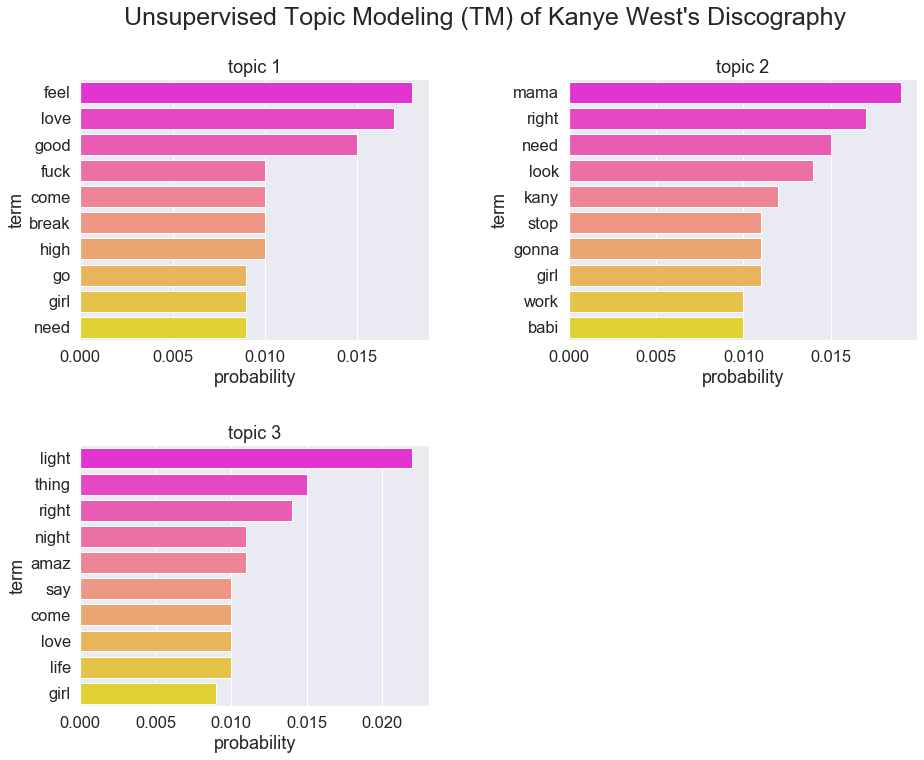

In [17]:
fig=plt.figure(figsize=(15,25)) #figsize=(15,2.4*15*((nt+1)/4))); #15
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(nt):
    sns.set(font_scale = 1.5)
    df=pd.DataFrame(sss[i], columns=['term','prob']).set_index('term')
#     plt.subplot(nt+1,2,i+1); #5
    ax = fig.add_subplot(nt+1,2,i+1)
    plt.title('topic '+str(i+1));
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='spring');
    plt.xlabel('probability');
sst="Unsupervised Topic Modeling (TM) of %s" %titlename
plt.suptitle(sst,fontsize=25, y=0.92);
plt.show()

In [18]:
from pyLDAvis import gensim as pgensim
vis = pgensim.prepare(lda_model,bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.015030 -0.049480       1        1  37.837967
2     -0.054972  0.012987       2        1  33.828716
1      0.039942  0.036493       3        1  28.333321, topic_info=      Term        Freq       Total Category  logprob  loglift
399   mama   90.000000   90.000000  Default  30.0000  30.0000
259  light  127.000000  127.000000  Default  29.0000  29.0000
279   amaz   52.000000   52.000000  Default  28.0000  28.0000
506  forev   46.000000   46.000000  Default  27.0000  27.0000
532   kany   78.000000   78.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
77     say   27.860880  114.456505   Topic3  -5.0059  -0.1518
166   fuck   26.509911  115.750221   Topic3  -5.0556  -0.2128
118   feel   28.229502  166.651031   Topic3  -4.9927  -0.5144
53    love   26.728750  169.345535   Topic3  -5.0474  -0.5851
120   good   24.004856  123.540894   Topic3  -5.1549  -0.3772

[228 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
279       2  0.981319     amaz
409       1  0.142969  america
409       2  0.786331  america
409       3  0.071485  america
866       1  0.088258  appreci
...     ...       ...      ...
298       2  0.685123    youll
298       3  0.128460    youll
105       1  0.405922     your
105       2  0.335935     your
105       3  0.251951     your

[459 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

### 1.2 The Network of Sententially Co-Occurrent Terms Derived from Unsupervised Topic Modeling

In [19]:
terms

['amaz',
 'babi',
 'break',
 'come',
 'feel',
 'fuck',
 'girl',
 'go',
 'gonna',
 'good',
 'high',
 'kany',
 'life',
 'light',
 'look',
 'love',
 'mama',
 'need',
 'night',
 'right',
 'say',
 'stop',
 'thing',
 'work']

In [20]:
pre=[]
for i in range(len(terms)):
    start=terms[i][:4]
    pre.append(start)
for j,k in Counter(pre).items():
    if k>1:
        print(j)

In [21]:
alias_dict={}
for n in terms:
    alias_dict[n]=n
    
print("The dictionary of aliases has %i keys (names) and %i unique values (aliased proper nouns)" %(len(alias_dict.keys()),len(set(alias_dict.values()))))

The dictionary of aliases has 24 keys (names) and 24 unique values (aliased proper nouns)


In [22]:
tdocs=" ".join(docs_kanye)
blob = TextBlob(tdocs)
textSentences = blob.sentences
sendic=dict()
for i,v in enumerate(textSentences):
    sent=v.sentiment.polarity
    wl=[]
    for term in list(set(alias_dict.values())):
        if term in v: 
            wl.append(term)
    if len(wl)>1:
        sendic[i]=wl 
medges=[]
for k,v in sendic.items():
    sent=textSentences[k].sentiment.polarity
    dd={}
    ps=set()
    for j in itertools.combinations(v, 2):
        ps.add(j)
        dd[j]=(k,sent)
    for jj in ps:
        s=0
        ss=0
        for kk,vv in dd.items():
            if kk==jj:
                s+=1
                ss+=vv[1]
        if alias_dict[jj[0]]!=alias_dict[jj[1]]:
            medges.append((alias_dict[jj[0]],alias_dict[jj[1]],"Sentence_"+str(k),ss/float(s)))
print("%s contains %i sentential co-occurrences among %i unsupervized TM terms"%(titlename,len(medges),len(set(alias_dict.values()))))
medges

Kanye West's Discography contains 3982 sentential co-occurrences among 24 unsupervized TM terms


[('love', 'need', 'Sentence_0', 0.14556143445032335),
 ('go', 'say', 'Sentence_0', 0.14556143445032335),
 ('right', 'girl', 'Sentence_0', 0.14556143445032335),
 ('right', 'say', 'Sentence_0', 0.14556143445032335),
 ('thing', 'say', 'Sentence_0', 0.14556143445032335),
 ('love', 'thing', 'Sentence_0', 0.14556143445032335),
 ('need', 'right', 'Sentence_0', 0.14556143445032335),
 ('love', 'girl', 'Sentence_0', 0.14556143445032335),
 ('life', 'say', 'Sentence_0', 0.14556143445032335),
 ('right', 'life', 'Sentence_0', 0.14556143445032335),
 ('go', 'right', 'Sentence_0', 0.14556143445032335),
 ('go', 'love', 'Sentence_0', 0.14556143445032335),
 ('need', 'say', 'Sentence_0', 0.14556143445032335),
 ('right', 'thing', 'Sentence_0', 0.14556143445032335),
 ('love', 'life', 'Sentence_0', 0.14556143445032335),
 ('need', 'girl', 'Sentence_0', 0.14556143445032335),
 ('girl', 'thing', 'Sentence_0', 0.14556143445032335),
 ('life', 'thing', 'Sentence_0', 0.14556143445032335),
 ('girl', 'say', 'Sentence_0

In [23]:
medgesd=[]
for e in medges:
    d={}
    d['Sentence']=e[2]
    d['Average sentiment']=e[3]
    medgesd.append((e[0],e[1],d))
    
G = nx.MultiGraph()
G.add_edges_from(medgesd)
for e in G.edges(data=True):
    if e[0]==e[1]:
        G.remove_edge(e[0],e[1])
weight={(x,y):v for (x, y), v in Counter(G.edges()).items()}
w_edges=[(x,y,z) for (x,y),z in weight.items()]
Gw = nx.Graph()
Gw.add_weighted_edges_from(w_edges)

print("The graph of sententially co-occurrent unsupervised TM terms in %s is a weighted graph and \n it has %i nodes and %i edges \n" %(titlename,len(Gw.nodes()),len(Gw.edges())))
out=' '.join([n+"\n" for n in alias_dict.values() if n not in Gw.nodes()])
print("The terms which do not co-occur in sentences are: \n %s" %out)
# print "Graph Gw is a weighted graph with %i nodes and %i edges" %(len(Gw.nodes()),len(Gw.edges()))
print("The density of this graph is %.3f" %nx.density(Gw))
if nx.is_connected(Gw)==True:
    print ("This graph is a connected graph")
else:
    print ("This graph is a disconnected graph and it has",nx.number_connected_components(Gw),"connected components" )   
    giant = max(nx.connected_component_subgraphs(Gw), key=len)
    Gwlcc=Gw.subgraph(giant)
    print ("The largest connected component of this graph is a weighted graph with %i nodes and %i edges" %(len(Gwlcc.nodes()),len(Gwlcc.edges())))
    print ("The density of the largest connected component of this graph is %.3f" %nx.density(Gwlcc))

The graph of sententially co-occurrent unsupervised TM terms in Kanye West's Discography is a weighted graph and 
 it has 23 nodes and 231 edges 

The terms which do not co-occur in sentences are: 
 kany

The density of this graph is 0.913
This graph is a connected graph


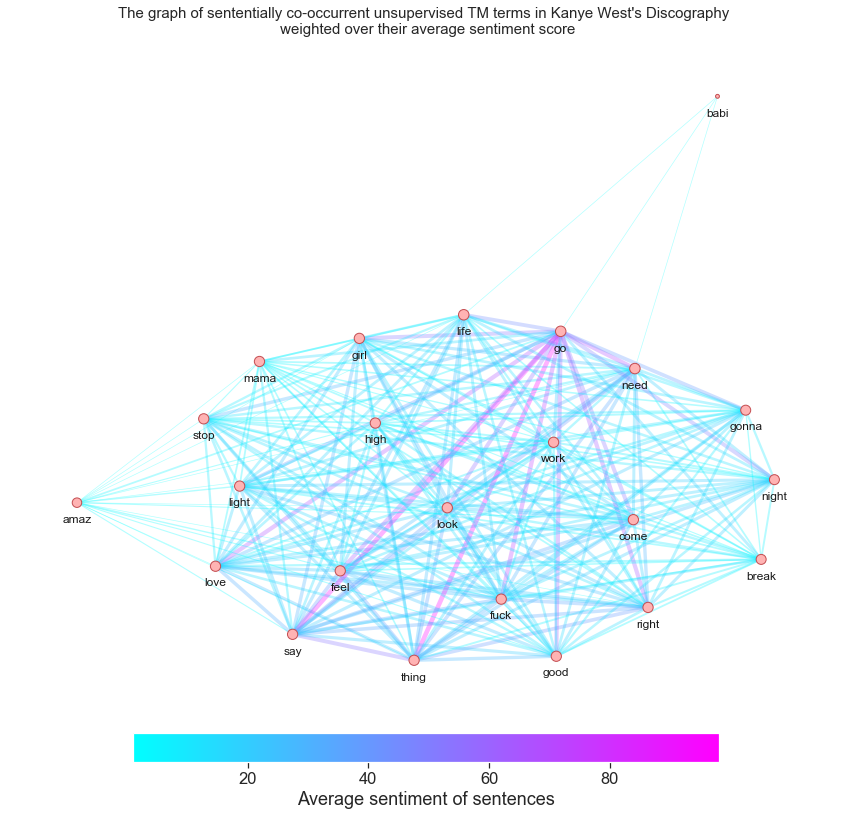

In [24]:
edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()]
edge_width=[math.log(1+w) for w in edge_width]
cmap=plt.cm.cool
weight_list = [ e[2]['weight'] for e in Gw.edges(data=True) ]
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
# width_list=[2*math.log(2+w) for w in weight_list]
width_list=[1.5*math.log(abs(min(weight_list))+2+w) for w in weight_list] #weight_list
nsi=[5*Gw.degree(n) for n in Gw.nodes()]

figsize=(15,15)

pos=graphviz_layout(Gw) 
# pos=nx.spring_layout(Gw)

node_color="#ffb3b3"
node_border_color="r"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(Gw, pos, node_color=node_color,node_size=nsi)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(Gw, pos, edge_color=edge_color,edge_cmap=cmap,vmin=vmin, vmax=vmax,width=edge_width,alpha=0.3)
plt.axis('off');
yoffset = {}
y_off = -5 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gw, yoffset,font_size=12);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='horizontal', shrink=0.7, pad = 0.02)
cbar.set_label('Average sentiment of sentences')
sst="The graph of sententially co-occurrent unsupervised TM terms in %s \n weighted over their average sentiment score" %titlename
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

In [25]:
def moveElements(namesList, matrixList, word):
    elementIndex = -1
    for i in range(len(namesList)):
        if namesList[i] == word:
            elementIndex = i
    if elementIndex == -1:
        print("error, could not find match on "+word)
        return 0
    else: 
        x = namesList.pop(elementIndex)
        y = matrixList.pop(elementIndex)
        namesList.append(x)
        matrixList.append(y)
        return namesList,matrixList

In [29]:
# names = Gw.nodes()
# names = np.unique(names).tolist()
# df = nx.to_numpy_matrix(Gw,dtype=int)
# A = np.squeeze(np.asarray(df))
# matrix = A.tolist()
# names,matrix = moveElements(names,matrix,"fuck")
# names,matrix = moveElements(names,matrix,"feel")
# names,matrix = moveElements(names,matrix,"thing")
# Chord(matrix, names,wrap_labels=False).to_html("chord_kanye.html")

In [30]:
IFrame(src='chord_kanye.html', width=700, height=700)

## 2. Kid Cudi

### 2.1 Unsupervised Topic Modeling

In [31]:
titlename = "Kid Cudi's Discography"

In [32]:
vocabulary = set()
for i in docs_cudi:
    words = tokenize(i)
    vocabulary.update(words)
 
vocabulary = list(vocabulary)
word_index = {w: idx for idx, w in enumerate(vocabulary)}
 
VOCABULARY_SIZE = len(vocabulary)
DOCUMENTS_COUNT = len(docs_cudi)
 
print(VOCABULARY_SIZE, DOCUMENTS_COUNT)

['you', 'sit', 'and', 'think', 'about', ',', 'how', 'you', 'can', 'hit', 'the', 'scene', '.', 'take', 'one', 'look', 'inside', ',', 'your', 'mirror', 'clear', 'to', 'see', '.', 'you', 'need', 'to', 'find', 'yourself', ',', 'as', 'honest', 'as', 'can', 'be', '...', 'there', 'must', 'be', '50', 'ways', 'to', 'make', 'a', 'record', '.', 'now', 'dont', 'get', 'wrapped', 'into', ',', 'the', 'hype', 'and', 'what', 'they', 'think', '.', 'this', 'shit', 'aint', 'rocket', 'science', ',', 'and', 'the', 'scene', 'changes', 'with', 'beats', '.', 'and', 'now', 'you', 'ask', 'yourself', ',', 'how', 'you', 'want', 'to', 'be', 'seen', '...', 'there', 'must', 'be', '50', 'ways', 'to', 'make', 'a', 'record', '.', 'hes', 'up', 'inside', 'the', 'clubs', ',', 'they', 'like', 'to', 'lean', 'and', 'rock', '.', 'oh', ',', 'stands', 'around', 'and', 'looks', 'intrigued', 'by', 'what', 'he', 'saw', '.', 'now', 'he', 'askes', 'me', ',', 'how', 'he', 'can', 'make', 'hit', 'songs', 'to', 'reach', 'the', 'top', '..

['its', 'a', 'revolution', 'hmm', ',', 'yea', ',', 'hmm', ',', 'yea', 'hmm', ',', 'yea', ',', 'yea', ',', 'yea', ',', 'yea', 'aye', ',', 'aye', 'now', ',', 'i', 'aint', 'riding', 'no', 'waves', 'too', 'busy', 'making', 'my', 'own', 'waves', ',', 'baby', 'i', 'aint', 'riding', 'no', 'waves', 'too', 'busy', 'making', 'my', 'own', 'waves', ',', 'baby', 'i', 'aint', 'riding', 'no', 'waves', 'too', 'busy', 'making', 'my', 'own', 'waves', ',', 'baby', 'i', 'aint', 'riding', 'no', 'waves', 'too', 'busy', 'making', 'my', 'own', 'waves', ',', 'baby', 'surfin', 'on', 'my', 'own', 'wave', ',', 'baby', 'surfin', 'on', 'my', 'own', 'wave', ',', 'baby', 'surfin', 'on', 'my', 'own', 'wave', ',', 'baby', 'surfin', 'on', 'my', 'own', 'wave', 'tonight', 'is', 'electrical', 'i', 'done', 'told', 'yall', ',', 'this', 'the', 'cinema', 'i', 'am', 'on', 'my', 'kubrick', 'horn', 'like', 'a', 'spielberg', 'close', 'encounter', 'form', 'feelin', 'awesome', 'to', 'be', 'black', 'and', 'im', 'murkin', 'all', 'comp

In [33]:
excl=[]
# processed_docs = ppdocs #[preprocess(doc) for doc in documents]
processed_docs = [preprocess(doc) for doc in docs_cudi]
processed_docs1=[]
for x in processed_docs:
    y=[]
    for xx in x:
        if xx not in excl:
            y.append(xx)
    processed_docs1.append(y)
processed_docs=processed_docs1
allw=[]
for x in processed_docs:
    for xx in x:
        if xx not in allw:
            allw.append(xx)
print(len(allw)) #All 3586
# processed_docs[:10]

2513


In [34]:
allws=[]
for z in processed_docs:
    for zz in z:
        allws.append(zz)
print(len(allws),len(set(allws)))
allwd=Counter(allws)
print(len(allwd))


14445 2513
2513


In [35]:
dictionary = gensim.corpora.Dictionary(processed_docs)
print(len(dictionary)) #All 3583
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

2513
0 aint
1 alot
2 ask
3 beat
4 buy
5 chang
6 clear
7 club
8 dim
9 dont
10 easi


In [36]:
dictionary.filter_extremes(no_below=3) #, no_above=0.8) #, keep_n=300) # 5
len(dictionary) 

661

In [37]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
# bow_corpus[43]

In [38]:
# mint = 3  # minimum number of topics
# maxt = 11 # maximum number of topics
# m=30
# X = range(mint,maxt)
# Y = []
# for n in X:
#     ft=[]
#     for j in range(m):
#         lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=n, id2word=dictionary, passes=2, workers=2)
#     #     topics = lda_model.print_topics()
#         sss=[]
#         for idx, topic in lda_model.print_topics(-1):
#             tt=[]
#             s=topic.split(" + ")
#             ss=[]
#             uu=[]
#             for t in s:
#                 u0=float(t.split("*")[0])
#                 u1=t.split("*")[1].replace('"','')
#                 if (u1,u0) not in ss:
#                     ss.append((u1,u0))
#                 if t not in uu:
#                     uu.append(t) 
#             sss.append(ss)
#             topic=" + ".join(uu).encode('utf-8')
#         doms=[]
#         for i in sss:
#             doms.append(i[0][0])
#         fi=len(set(doms))/n
#         ft.append(fi)
#     fis=sum(ft)/m
#     Y.append(fis)
# # print(list(X))
# print(Y)
# nn=[]
# for i,y in enumerate(Y):
#     if y==max(Y): #1:
#         print(Y.index(y))
#         nn.append(i)
# print(nn)
# NT=nn[-1]+mint
# print(NT)

In [39]:
# nt=NT #number_of_topics
nt=3
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=nt, id2word=dictionary, passes=2, workers=2)

In [40]:
topics = lda_model.print_topics() #350  #num_words=25

terms=[]
lt=[]
for i in range(nt):
    for t in topics: 
        lt.append(t[1].split(" + "))
for s in lt:
    for ss in s:
        terms.append(ss[6:])
#         if re.sub(r'[^a-zA-Z]','', ss) not in terms:
#             terms.append(re.sub(r'[^a-zA-Z]','', ss))
terms=[t.replace('"',"") for t in terms]
terms=sorted(set(terms))
print(len(terms))
print(" ")
print("LIST OF UNSUPERVISED TM TERMS:")
print(" ")
for i in terms:
    print(i)

23
 
LIST OF UNSUPERVISED TM TERMS:
 
aint
babi
better
caus
come
feel
friend
fuck
heart
heaven
love
mind
nigga
night
right
smile
tell
think
tri
want
wave
yeah
young


In [41]:
sss=[]
for idx, topic in lda_model.print_topics(-1):
    tt=[]
    s=topic.split(" + ")
    ss=[]
    uu=[]
    for t in s:
        u0=float(t.split("*")[0])
        u1=t.split("*")[1].replace('"','')
        if (u1,u0) not in ss:
            ss.append((u1,u0))
        if t not in uu:
            uu.append(t) 
    sss.append(ss)
    topic=" + ".join(uu).encode('utf-8')
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: b'0.021*"night" + 0.018*"tell" + 0.016*"nigga" + 0.015*"feel" + 0.015*"right" + 0.014*"yeah" + 0.014*"think" + 0.014*"love" + 0.012*"mind" + 0.011*"aint"'
Topic: 1 
Words: b'0.036*"wave" + 0.028*"yeah" + 0.021*"better" + 0.019*"babi" + 0.017*"friend" + 0.014*"smile" + 0.013*"tri" + 0.013*"heaven" + 0.012*"heart" + 0.012*"nigga"'
Topic: 2 
Words: b'0.033*"yeah" + 0.020*"nigga" + 0.016*"young" + 0.016*"caus" + 0.015*"feel" + 0.015*"tell" + 0.014*"want" + 0.014*"come" + 0.012*"aint" + 0.012*"fuck"'


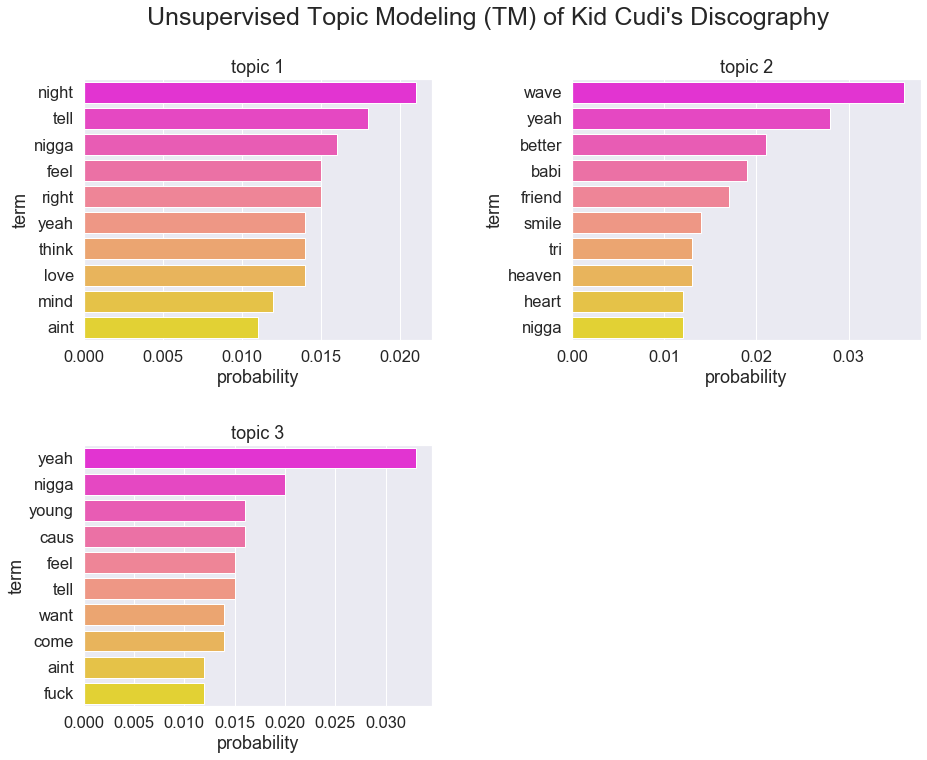

In [42]:
fig=plt.figure(figsize=(15,25)) #figsize=(15,2.4*15*((nt+1)/4))); #15
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(nt):
    sns.set(font_scale = 1.5)
    df=pd.DataFrame(sss[i], columns=['term','prob']).set_index('term')
#     plt.subplot(nt+1,2,i+1); #5
    ax = fig.add_subplot(nt+1,2,i+1)
    plt.title('topic '+str(i+1));
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='spring');
    plt.xlabel('probability');
sst="Unsupervised Topic Modeling (TM) of %s" %titlename
plt.suptitle(sst,fontsize=25, y=0.92);
plt.show()

In [43]:
from pyLDAvis import gensim as pgensim
vis = pgensim.prepare(lda_model,bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.048500  0.046364       1        1  43.093555
2     -0.039716 -0.049547       2        1  39.071213
1      0.088216  0.003183       3        1  17.835232, topic_info=       Term        Freq       Total Category  logprob  loglift
598    wave   68.000000   68.000000  Default  30.0000  30.0000
41   better   57.000000   57.000000  Default  29.0000  29.0000
167    babi   69.000000   69.000000  Default  28.0000  28.0000
104    yeah  248.000000  248.000000  Default  27.0000  27.0000
89   friend   63.000000   63.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
34    think   17.954285  109.374146   Topic3  -4.6359  -0.0830
9      fuck   15.466691   98.814621   Topic3  -4.7850  -0.1306
68     life   13.337457   56.903469   Topic3  -4.9332   0.2732
36     want   15.612140  119.531082   Topic3  -4.7757  -0.3115
47     come   12.772529  109.273445   Topic3  -4.9764  -0.4226

[214 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
591       1  0.094192  afraid
591       2  0.188384  afraid
591       3  0.753535  afraid
0         1  0.411158    aint
0         2  0.419724    aint
...     ...       ...     ...
83        1  0.231653    your
83        2  0.531439    your
83        3  0.231653    your
375       1  0.173539    zone
375       2  0.780924    zone

[422 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

### 2.2 The Network of Sententially Co-Occurrent Terms Derived from Unsupervised Topic Modeling

In [44]:
terms

['aint',
 'babi',
 'better',
 'caus',
 'come',
 'feel',
 'friend',
 'fuck',
 'heart',
 'heaven',
 'love',
 'mind',
 'nigga',
 'night',
 'right',
 'smile',
 'tell',
 'think',
 'tri',
 'want',
 'wave',
 'yeah',
 'young']

In [45]:
pre=[]
for i in range(len(terms)):
    start=terms[i][:4]
    pre.append(start)
for j,k in Counter(pre).items():
    if k>1:
        print(j)

In [46]:
alias_dict={}
for n in terms:
    alias_dict[n]=n
    
print("The dictionary of aliases has %i keys (names) and %i unique values (aliased proper nouns)" %(len(alias_dict.keys()),len(set(alias_dict.values()))))

The dictionary of aliases has 23 keys (names) and 23 unique values (aliased proper nouns)


In [47]:
tdocs=" ".join(docs_cudi)
blob = TextBlob(tdocs)
textSentences = blob.sentences
sendic=dict()
for i,v in enumerate(textSentences):
    sent=v.sentiment.polarity
    wl=[]
    for term in list(set(alias_dict.values())):
        if term in v: 
            wl.append(term)
    if len(wl)>1:
        sendic[i]=wl 
medges=[]
for k,v in sendic.items():
    sent=textSentences[k].sentiment.polarity
    dd={}
    ps=set()
    for j in itertools.combinations(v, 2):
        ps.add(j)
        dd[j]=(k,sent)
    for jj in ps:
        s=0
        ss=0
        for kk,vv in dd.items():
            if kk==jj:
                s+=1
                ss+=vv[1]
        if alias_dict[jj[0]]!=alias_dict[jj[1]]:
            medges.append((alias_dict[jj[0]],alias_dict[jj[1]],"Sentence_"+str(k),ss/float(s)))
print("%s contains %i sentential co-occurrences among %i unsupervized TM terms"%(titlename,len(medges),len(set(alias_dict.values()))))
medges

Kid Cudi's Discography contains 2195 sentential co-occurrences among 23 unsupervized TM terms


[('want', 'night', 'Sentence_23', 0.012500000000000002),
 ('feel', 'better', 'Sentence_26', 0.21666666666666667),
 ('aint', 'friend', 'Sentence_28', 0.7),
 ('aint', 'friend', 'Sentence_29', 0.7),
 ('aint', 'friend', 'Sentence_30', 0.7),
 ('come', 'heart', 'Sentence_32', 0.0855685131195335),
 ('feel', 'right', 'Sentence_32', 0.0855685131195335),
 ('heaven', 'yeah', 'Sentence_32', 0.0855685131195335),
 ('heart', 'friend', 'Sentence_32', 0.0855685131195335),
 ('right', 'yeah', 'Sentence_32', 0.0855685131195335),
 ('feel', 'heaven', 'Sentence_32', 0.0855685131195335),
 ('feel', 'yeah', 'Sentence_32', 0.0855685131195335),
 ('feel', 'come', 'Sentence_32', 0.0855685131195335),
 ('heaven', 'right', 'Sentence_32', 0.0855685131195335),
 ('heaven', 'night', 'Sentence_32', 0.0855685131195335),
 ('right', 'friend', 'Sentence_32', 0.0855685131195335),
 ('heaven', 'come', 'Sentence_32', 0.0855685131195335),
 ('feel', 'night', 'Sentence_32', 0.0855685131195335),
 ('heaven', 'friend', 'Sentence_32', 0.

In [48]:
medgesd=[]
for e in medges:
    d={}
    d['Sentence']=e[2]
    d['Average sentiment']=e[3]
    medgesd.append((e[0],e[1],d))
    
G = nx.MultiGraph()
G.add_edges_from(medgesd)
for e in G.edges(data=True):
    if e[0]==e[1]:
        G.remove_edge(e[0],e[1])
weight={(x,y):v for (x, y), v in Counter(G.edges()).items()}
w_edges=[(x,y,z) for (x,y),z in weight.items()]
Gw = nx.Graph()
Gw.add_weighted_edges_from(w_edges)

print("The graph of sententially co-occurrent unsupervised TM terms in %s is a weighted graph and \n it has %i nodes and %i edges \n" %(titlename,len(Gw.nodes()),len(Gw.edges())))
out=' '.join([n+"\n" for n in alias_dict.values() if n not in Gw.nodes()])
print("The terms which do not co-occur in sentences are: \n %s" %out)
# print "Graph Gw is a weighted graph with %i nodes and %i edges" %(len(Gw.nodes()),len(Gw.edges()))
print("The density of this graph is %.3f" %nx.density(Gw))
if nx.is_connected(Gw)==True:
    print ("This graph is a connected graph")
else:
    print ("This graph is a disconnected graph and it has",nx.number_connected_components(Gw),"connected components" )   
    giant = max(nx.connected_component_subgraphs(Gw), key=len)
    Gwlcc=Gw.subgraph(giant)
    print ("The largest connected component of this graph is a weighted graph with %i nodes and %i edges" %(len(Gwlcc.nodes()),len(Gwlcc.edges())))
    print ("The density of the largest connected component of this graph is %.3f" %nx.density(Gwlcc))

The graph of sententially co-occurrent unsupervised TM terms in Kid Cudi's Discography is a weighted graph and 
 it has 23 nodes and 234 edges 

The terms which do not co-occur in sentences are: 
 
The density of this graph is 0.925
This graph is a connected graph


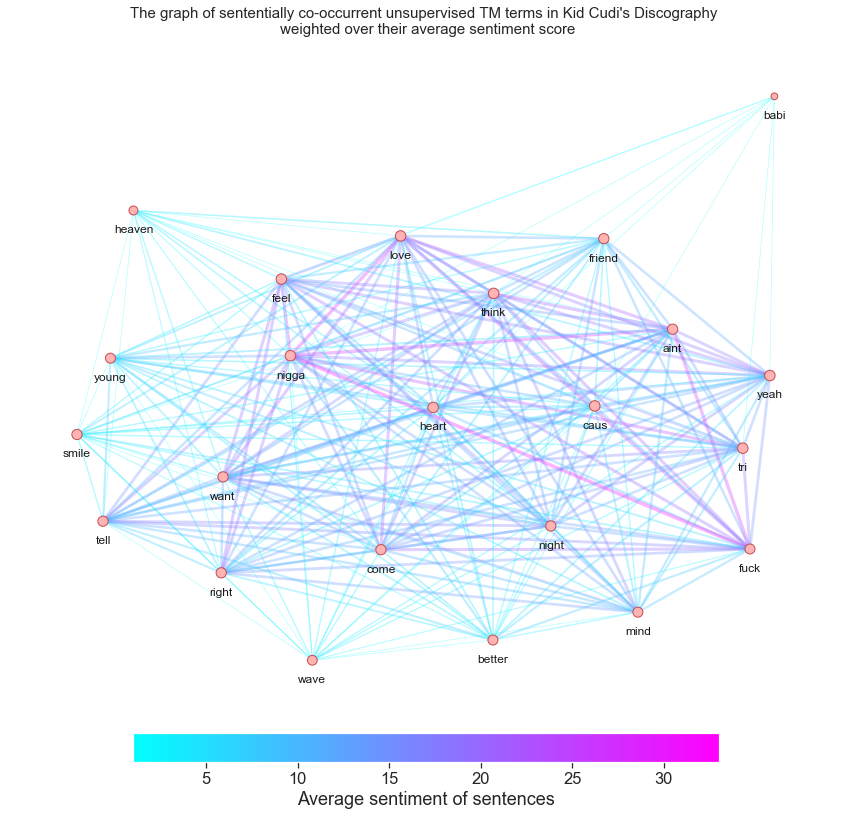

In [49]:
edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()]
edge_width=[math.log(1+w) for w in edge_width]
cmap=plt.cm.cool
weight_list = [ e[2]['weight'] for e in Gw.edges(data=True) ]
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
# width_list=[2*math.log(2+w) for w in weight_list]
width_list=[1.5*math.log(abs(min(weight_list))+2+w) for w in weight_list] #weight_list
nsi=[5*Gw.degree(n) for n in Gw.nodes()]

figsize=(15,15)

pos=graphviz_layout(Gw) 
# pos=nx.spring_layout(Gw)

node_color="#ffb3b3"
node_border_color="r"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(Gw, pos, node_color=node_color,node_size=nsi)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(Gw, pos, edge_color=edge_color,edge_cmap=cmap,vmin=vmin, vmax=vmax,width=edge_width,alpha=0.3)
plt.axis('off');
yoffset = {}
y_off = -5 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gw, yoffset,font_size=12);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='horizontal', shrink=0.7, pad = 0.02)
cbar.set_label('Average sentiment of sentences')
sst="The graph of sententially co-occurrent unsupervised TM terms in %s \n weighted over their average sentiment score" %titlename
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

In [51]:
# names = Gw.nodes()
# names = np.unique(names).tolist()
# df = nx.to_numpy_matrix(Gw,dtype=int)
# A = np.squeeze(np.asarray(df))
# matrix = A.tolist()
# # names,matrix = moveElements(names,matrix,"wave")
# Chord(matrix, names,wrap_labels=False).to_html("chord_cudi.html")

In [52]:
IFrame(src='chord_cudi.html', width=700, height=700)

## 3. Jay-Z

### 3.1 Unsupervised Topic Modeling

In [53]:
titlename = "Jay-Z's Discography"

In [54]:
vocabulary = set()
for i in docs_jayz:
    words = tokenize(i)
    vocabulary.update(words)
 
vocabulary = list(vocabulary)
word_index = {w: idx for idx, w in enumerate(vocabulary)}
 
VOCABULARY_SIZE = len(vocabulary)
DOCUMENTS_COUNT = len(docs_jayz)
 
print(VOCABULARY_SIZE, DOCUMENTS_COUNT)

['its', 'the', 'dynasty', 'niggaz', 'as', 'promised', 'the', 'worlds', 'most', 'infamous', 'roc-a-fella', 'records', 'this', 'is', 'roc', 'la', 'familia', 'its', 'young', 'hova', ',', 'beanie', 'sigel', ',', 'memphis', 'bleek', ',', 'amil-lion', 'its', 'the', 'dynasty', 'niggaz', ',', '2000', 'to', 'infinity', 'this', 'is', 'ghetto', 'to', 'ghetto', ',', 'gutter', 'to', 'gutter', 'street', 'corner', 'to', 'street', 'corner', ',', 'project', 'to', 'project', 'worldwide', ',', 'walk', 'with', 'us', 'niggaz', 'hoffa', ',', 'dash', ',', 'its', 'the', 'dynasty', 'niggaz', 'check', 'it', 'out', 'uh', ',', 'walk', 'with', 'me', ',', 'talk', 'to', 'me', ',', 'yo', 'the', 'theme', 'song', 'to', 'the', 'sopranos', 'plays', 'in', 'the', 'key', 'of', 'life', 'on', 'my', 'mental', 'piano', 'got', 'a', 'strange', 'way', 'of', 'seein', 'life', 'like', 'im', 'stevie', 'wonder', 'with', ',', 'beads', 'under', 'the', 'doo-rag', 'intuition', 'is', 'there', 'even', 'when', 'my', 'visions', 'impaired', ','

['(', 'intro', ':', 'santogold', ')', 'brooklyn', '!', 'brooklyn', '!', 'brooklyn', '!', 'brooklyn', '!', 'brooklyn', '!', 'we', 'go', 'hard', '!', 'we', 'go', 'hard', '!', '(', 'chorus', ':', 'santogold', ')', 'brooklyn', 'we', 'go', 'hard', ',', 'we', 'go', 'hard', '!', 'brooklyn', 'we', 'go', 'hard', ',', 'we', 'go', 'hard', '!', 'brooklyn', 'we', 'go', 'hard', ',', 'we', 'go', 'hard', '!', 'brooklyn', 'we', 'go', 'hard', ',', 'we', 'go', 'hard', '!', 'brooklyn', 'we', 'go', 'hard', ',', 'we', 'go', 'hard', '!', 'brooklyn', 'we', 'go', 'hard', ',', 'we', 'go', 'hard', '!', 'brooklyn', 'we', 'go', 'hard', ',', 'we', 'go', 'hard', '!', 'brooklyn', 'we', 'go', 'hard', ',', 'we', 'go', 'hard', '!', '(', 'verse', 'one', ':', 'jay-z', ')', 'this', 'is', 'black', 'hoodie', 'rap', ',', 'theres', 'no', 'fear', 'in', 'my', 'eyes', 'where', 'they', 'lookin', 'at', 'better', 'look', 'on', 'map', ',', 'besides', ',', 'mi', 'nah', 'like', 'to', 'eye', 'fight', 'mi', 'nah', 'think', 'such', 'a', '

['im', 'feelin', 'it', 'fill', 'the', 'glass', 'to', 'the', 'top', 'with', 'moet', 'feelin', 'it', 'feel', 'the', 'legs', 'pushin', 'up', 'on', 'the', 'sand', 'im', 'feelin', 'it', 'feel', 'the', 'high', 'that', 'you', 'get', 'from', 'the', 'lye', 'feelin', 'it', 'if', 'you', 'feel', 'it', 'raise', 'your', 'l', 'in', 'the', 'sky', 'i', 'keep', 'it', 'realer', 'than', 'most', 'i', 'know', 'you', 'feelin', 'it', 'cristal', 'on', 'ice', 'i', 'like', 'those', 'toes', 'i', 'keep', 'from', 'spillin', 'it', 'bone', 'crushers', 'i', 'keep', 'real', 'close', 'i', 'got', 'the', 'skill', 'for', 'this', 'on', 'my', 'back', 'the', 'fliest', 'clothes', 'lookin', 'ill', 'as', 'shit', 'transactions', 'illegitimate', 'cause', 'life', 'is', 'still', 'a', 'bitch', 'and', 'then', 'you', 'die', 'but', 'for', 'now', 'life', 'close', 'your', 'eyes', 'and', 'feel', 'this', 'dick', 'since', 'diapers', 'had', 'nothin', 'to', 'live', 'for', 'like', 'them', 'lifers', 'but', 'makin', 'sure', 'every', 'nigga', 'sta

['jay-z', ':', 'bounce', 'if', 'you', 'wan', 'na', 'bounce', ',', 'ball', 'if', 'you', 'wan', 'na', 'ball', 'play', 'if', 'you', 'wan', 'na', 'play', ',', 'floss', 'if', 'you', 'wan', 'na', 'floss', 'its', 'all', 'right', ',', 'you', 'heard', '?', ',', 'its', 'all', 'right', ',', 'holla', 'back', 'get', 'ill', 'if', 'you', 'wan', 'na', 'ill', ',', 'smoke', 'if', 'you', 'wan', 'na', 'smoke', 'kill', 'if', 'you', 'wan', 'na', 'kill', ',', 'loc', 'if', 'you', 'wan', 'na', 'loc', 'its', 'all', 'right', ',', 'you', 'heard', '?', 'its', 'all', 'right', ',', 'yeah', 'yeah', 'i', 'need', 'a', 'ho', 'in', 'my', 'life', 'to', 'blow', 'on', 'my', 'dice', 'so', 'we', 'can', 'make', 'our', 'points', 'twice', 'and', 'skate', 'out', 'a', 'town', 'i', 'need', 'that', 'glow', 'in', 'my', 'ice', ',', 'e-class', 'ladies', 'screamin', 'jigga', 'you', 'know', 'we', 'ease', 'that', ',', 'flowin', 'out', 'like', 'jees-ass', 'jay-z', 'and', 'me', 'holdin', 'the', 'mic', 'so', 'when', 'you', 'like', 'you', 'fi

['(', 'intro/chorus', ':', 'repeat', '2x', ')', 'and', 'we', 'gon', 'stay', 'hustlin', 'on', 'that', 'block', 'until', 'we', 'caught', 'and', 'we', 'gon', 'stay', 'showin', 'off', 'that', 'jewelry', 'that', 'we', 'bought', 'and', 'we', 'gon', 'stay', 'leavin', 'out', 'the', 'stores', 'with', 'heavy', 'bags', 'cause', 'we', 'poppin', 'tags', ',', 'pimpin', 'we', 'be', 'poppin', 'tags', '!', '(', 'verse', 'one', ':', 'jay-z', ')', 'we', 'arose', ',', 'lets', 'go', '``', 'so', 'fresh', 'so', 'clean', "''", 'like', 'kast', 'jay-z', 'be', 'poppin', 'tags', 'leavin', 'the', 'mall', 'with', 'heavy', 'bags', 'you', 'know', 'the', 'boy', 'got', 'a', 'love', 'for', 'the', 'cash', 'aw', 'fuck', ',', 'there', 'he', 'go', 'again', 'talkin', 'bout', 'hoes', 'and', 'dough', 'again', 'yup', '!', '--', 'cant', 'hold', 'it', 'in', 'im', 'surprised', 'i', 'got', 'so', 'much', 'dough', 'to', 'spend', 'but', ',', 'back', 'when', 'i', 'was', 'poorer', 'then', 'you', 'wasnt', 'focusin', ',', 'about', 'the', 

['(', 'pharrell', ')', 'yeah', '3', 'in', 'the', 'morning', 'on', 'the', 'westside', 'highway', ',', 'top', 'down', 'baby', ',', 'fuck', 'yall', 'the', 'motivation', 'for', 'me', 'was', 'them', 'telling', 'me', 'what', 'i', 'couldnt', 'be', ',', 'oh', 'well', '(', 'jay-z', ')', 'this', 'a', 'special', 'dedication', 'i', 'wan', 'na', 'thank', 'you', 'for', 'the', 'fuel', 'no', 'really', 'thank', 'you', '(', 'verse', '1', '-', 'jay-z', ')', 'i', 'felt', 'so', 'inspired', 'by', 'what', 'my', 'teacher', 'said', 'said', 'id', 'either', 'be', 'dead', 'or', 'be', 'a', 'reefer', 'head', 'now', 'sure', 'if', 'thats', 'how', 'adults', 'should', 'speak', 'to', 'kids', 'especially', 'when', 'the', 'only', 'thing', 'i', 'did', 'was', 'speak', 'in', 'class', 'ill', 'teach', 'his', 'ass', 'even', 'betters', 'what', 'my', 'uncle', 'did', 'i', 'pop', 'my', 'demo', 'tape', 'in', 'start', 'to', 'beat', 'my', 'head', 'peaked', 'out', 'my', 'eye', ',', 'see', 'if', 'he', 'was', 'beating', 'his', 'he', 'mig

['(', 'jay-z', ')', 'geah', '...', 'whassup', '?', 'wheres', 'all', 'my', 'street', 'niggaz', ',', 'project', 'niggaz', 'real', 'niggaz', ',', 'worldwide', 'lets', 'reflect', '...', 'erybody', 'got', 'a', 'story', 'we', 'all', 'ghetto', 'b', '-', 'heres', 'mine', 'geah', 'see', 'i', 'was', '--', 'born', 'in', 'sewage', ',', 'born', 'to', 'make', 'bomb', 'music', 'flow', 'tight', 'like', 'i', 'was', 'born', 'jewish', 'used', 'the', 'streets', 'as', 'a', 'conduit', '-', 'i', 'kept', 'arms', '38', 'longs', 'inside', 'my', 'moms', 'buick', 'at', 'any', 'given', 'moment', 'shawn', 'could', 'lose', 'it', ',', 'be', 'on', 'the', 'news', 'iron', 'cuffs', '-', 'arms', 'through', 'it', ';', 'or', 'stuffed', 'with', 'embalmin', 'fluid', 'shit', ',', 'im', 'goin', 'through', 'it', '-', 'mom', 'dukes', 'too', 'tears', 'streamin', 'down', 'her', 'pretty', 'face', ',', 'she', 'got', 'her', 'palms', 'to', 'it', 'my', 'life', 'is', 'gettin', 'too', 'wild', 'i', 'need', 'to', 'bring', 'some', 'sort', 'k

In [55]:
excl=[]
# processed_docs = ppdocs #[preprocess(doc) for doc in documents]
processed_docs = [preprocess(doc) for doc in docs_jayz]
processed_docs1=[]
for x in processed_docs:
    y=[]
    for xx in x:
        if xx not in excl:
            y.append(xx)
    processed_docs1.append(y)
processed_docs=processed_docs1
allw=[]
for x in processed_docs:
    for xx in x:
        if xx not in allw:
            allw.append(xx)
print(len(allw)) #All 3586
# processed_docs[:10]

7015


In [56]:
allws=[]
for z in processed_docs:
    for zz in z:
        allws.append(zz)
print(len(allws),len(set(allws)))
allwd=Counter(allws)
print(len(allwd))


54532 7015
7015


In [57]:
dictionary = gensim.corpora.Dictionary(processed_docs)
print(len(dictionary)) #All 3583
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

7015
0 actin
1 adventur
2 amil
3 arm
4 bead
5 beani
6 bein
7 bench
8 biscuit
9 bleek
10 bout


In [58]:
dictionary.filter_extremes(no_below=4) #, no_above=0.8) #, keep_n=300) # 5
len(dictionary) 

1803

In [59]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
# bow_corpus[43]

In [60]:
# mint = 3  # minimum number of topics
# maxt = 11 # maximum number of topics
# m=30
# X = range(mint,maxt)
# Y = []
# for n in X:
#     ft=[]
#     for j in range(m):
#         lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=n, id2word=dictionary, passes=2, workers=2)
#     #     topics = lda_model.print_topics()
#         sss=[]
#         for idx, topic in lda_model.print_topics(-1):
#             tt=[]
#             s=topic.split(" + ")
#             ss=[]
#             uu=[]
#             for t in s:
#                 u0=float(t.split("*")[0])
#                 u1=t.split("*")[1].replace('"','')
#                 if (u1,u0) not in ss:
#                     ss.append((u1,u0))
#                 if t not in uu:
#                     uu.append(t) 
#             sss.append(ss)
#             topic=" + ".join(uu).encode('utf-8')
#         doms=[]
#         for i in sss:
#             doms.append(i[0][0])
#         fi=len(set(doms))/n
#         ft.append(fi)
#     fis=sum(ft)/m
#     Y.append(fis)
# # print(list(X))
# print(Y)
# nn=[]
# for i,y in enumerate(Y):
#     if y==max(Y): #1:
#         print(Y.index(y))
#         nn.append(i)
# print(nn)
# NT=nn[-1]+mint
# print(NT)

In [61]:
# nt=NT #number_of_topics
nt=3
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=nt, id2word=dictionary, passes=2, workers=2)

In [62]:
topics = lda_model.print_topics() #350  #num_words=25

terms=[]
lt=[]
for i in range(nt):
    for t in topics: 
        lt.append(t[1].split(" + "))
for s in lt:
    for ss in s:
        terms.append(ss[6:])
#         if re.sub(r'[^a-zA-Z]','', ss) not in terms:
#             terms.append(re.sub(r'[^a-zA-Z]','', ss))
terms=[t.replace('"',"") for t in terms]
terms=sorted(set(terms))
print(len(terms))
print(" ")
print("LIST OF UNSUPERVISED TM TERMS:")
print(" ")
for i in terms:
    print(i)

21
 
LIST OF UNSUPERVISED TM TERMS:
 
babi
bitch
bout
brooklyn
feel
game
girl
hard
hear
jigga
life
money
niggaz
real
say
stop
wanna
want
world
young
your


In [63]:
sss=[]
for idx, topic in lda_model.print_topics(-1):
    tt=[]
    s=topic.split(" + ")
    ss=[]
    uu=[]
    for t in s:
        u0=float(t.split("*")[0])
        u1=t.split("*")[1].replace('"','')
        if (u1,u0) not in ss:
            ss.append((u1,u0))
        if t not in uu:
            uu.append(t) 
    sss.append(ss)
    topic=" + ".join(uu).encode('utf-8')
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: b'0.013*"girl" + 0.009*"money" + 0.008*"feel" + 0.007*"hard" + 0.007*"bitch" + 0.007*"bout" + 0.006*"want" + 0.006*"babi" + 0.006*"niggaz" + 0.005*"wanna"'
Topic: 1 
Words: b'0.014*"life" + 0.010*"wanna" + 0.008*"real" + 0.008*"game" + 0.007*"bitch" + 0.006*"world" + 0.006*"hear" + 0.006*"babi" + 0.005*"money" + 0.005*"your"'
Topic: 2 
Words: b'0.013*"niggaz" + 0.009*"babi" + 0.009*"jigga" + 0.008*"want" + 0.008*"life" + 0.008*"say" + 0.007*"bitch" + 0.006*"brooklyn" + 0.006*"stop" + 0.006*"young"'


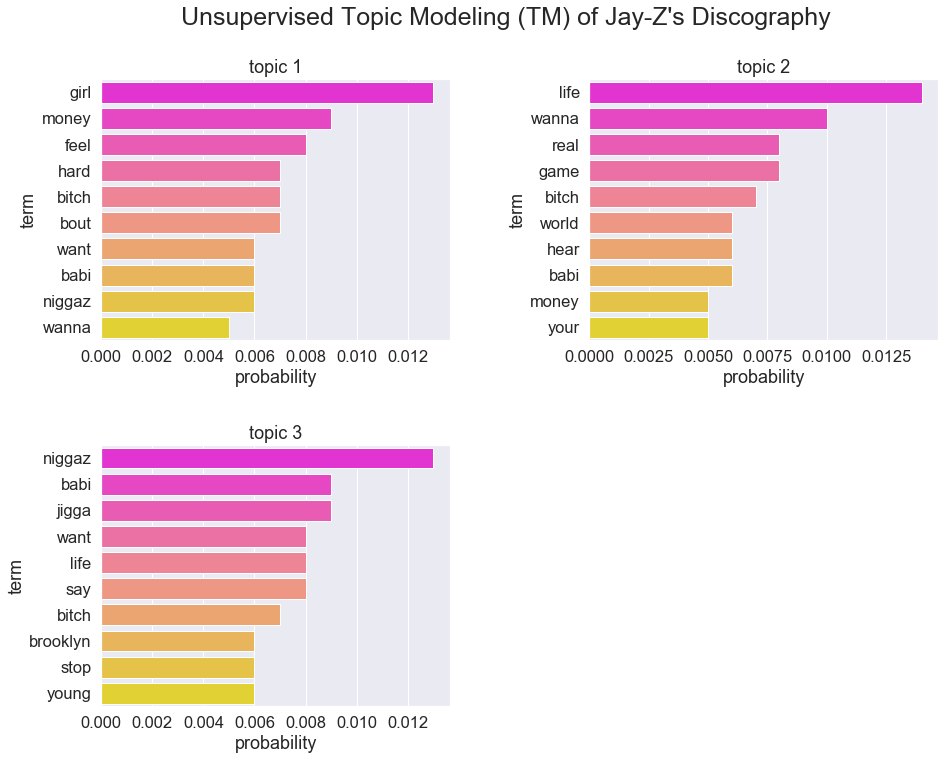

In [64]:
fig=plt.figure(figsize=(15,25)) #figsize=(15,2.4*15*((nt+1)/4))); #15
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(nt):
    sns.set(font_scale = 1.5)
    df=pd.DataFrame(sss[i], columns=['term','prob']).set_index('term')
#     plt.subplot(nt+1,2,i+1); #5
    ax = fig.add_subplot(nt+1,2,i+1)
    plt.title('topic '+str(i+1));
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='spring');
    plt.xlabel('probability');
sst="Unsupervised Topic Modeling (TM) of %s" %titlename
plt.suptitle(sst,fontsize=25, y=0.92);
plt.show()

In [65]:
from pyLDAvis import gensim as pgensim
vis = pgensim.prepare(lda_model,bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.015724  0.025746       1        1  38.114498
1     -0.019119 -0.024126       2        1  32.902092
0      0.034843 -0.001620       3        1  28.983402, topic_info=         Term        Freq       Total Category  logprob  loglift
100      girl  267.000000  267.000000  Default  30.0000  30.0000
42     niggaz  283.000000  283.000000  Default  29.0000  29.0000
251  brooklyn  123.000000  123.000000  Default  28.0000  28.0000
270      hole   57.000000   57.000000  Default  27.0000  27.0000
33       life  346.000000  346.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
42     niggaz   59.827324  283.789185   Topic3  -5.1939  -0.3183
335      leav   46.871346  169.769012   Topic3  -5.4379  -0.0486
645      live   46.421856  166.957870   Topic3  -5.4476  -0.0415
33       life   56.993759  346.314453   Topic3  -5.2424  -0.5660
346      real   42.091579  206.143005   Topic3  -5.5455  -0.3503

[248 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
759       1  0.179703    act
759       2  0.179703    act
759       3  0.718811    act
1         1  0.409524   amil
1         2  0.025595   amil
...     ...       ...    ...
80        2  0.210227  young
80        3  0.229936  young
365       1  0.386546   your
365       2  0.462475   your
365       3  0.151857   your

[535 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

### 3.2 The Network of Sententially Co-Occurrent Terms Derived from Unsupervised Topic Modeling

In [66]:
terms

['babi',
 'bitch',
 'bout',
 'brooklyn',
 'feel',
 'game',
 'girl',
 'hard',
 'hear',
 'jigga',
 'life',
 'money',
 'niggaz',
 'real',
 'say',
 'stop',
 'wanna',
 'want',
 'world',
 'young',
 'your']

In [67]:
pre=[]
for i in range(len(terms)):
    start=terms[i][:4]
    pre.append(start)
for j,k in Counter(pre).items():
    if k>1:
        print(j)

In [68]:
alias_dict={}
for n in terms:
    alias_dict[n]=n
    
print("The dictionary of aliases has %i keys (names) and %i unique values (aliased proper nouns)" %(len(alias_dict.keys()),len(set(alias_dict.values()))))

The dictionary of aliases has 21 keys (names) and 21 unique values (aliased proper nouns)


In [69]:
tdocs=" ".join(docs_jayz)
blob = TextBlob(tdocs)
textSentences = blob.sentences
sendic=dict()
for i,v in enumerate(textSentences):
    sent=v.sentiment.polarity
    wl=[]
    for term in list(set(alias_dict.values())):
        if term in v: 
            wl.append(term)
    if len(wl)>1:
        sendic[i]=wl 
medges=[]
for k,v in sendic.items():
    sent=textSentences[k].sentiment.polarity
    dd={}
    ps=set()
    for j in itertools.combinations(v, 2):
        ps.add(j)
        dd[j]=(k,sent)
    for jj in ps:
        s=0
        ss=0
        for kk,vv in dd.items():
            if kk==jj:
                s+=1
                ss+=vv[1]
        if alias_dict[jj[0]]!=alias_dict[jj[1]]:
            medges.append((alias_dict[jj[0]],alias_dict[jj[1]],"Sentence_"+str(k),ss/float(s)))
print("%s contains %i sentential co-occurrences among %i unsupervized TM terms"%(titlename,len(medges),len(set(alias_dict.values()))))
medges

Jay-Z's Discography contains 4901 sentential co-occurrences among 21 unsupervized TM terms


[('stop', 'world', 'Sentence_0', -0.02166666666666666),
 ('hard', 'world', 'Sentence_0', -0.02166666666666666),
 ('hear', 'world', 'Sentence_0', -0.02166666666666666),
 ('niggaz', 'stop', 'Sentence_0', -0.02166666666666666),
 ('life', 'stop', 'Sentence_0', -0.02166666666666666),
 ('niggaz', 'bout', 'Sentence_0', -0.02166666666666666),
 ('bout', 'life', 'Sentence_0', -0.02166666666666666),
 ('bout', 'hard', 'Sentence_0', -0.02166666666666666),
 ('bout', 'hear', 'Sentence_0', -0.02166666666666666),
 ('life', 'say', 'Sentence_0', -0.02166666666666666),
 ('niggaz', 'say', 'Sentence_0', -0.02166666666666666),
 ('stop', 'hard', 'Sentence_0', -0.02166666666666666),
 ('stop', 'hear', 'Sentence_0', -0.02166666666666666),
 ('hard', 'hear', 'Sentence_0', -0.02166666666666666),
 ('bout', 'stop', 'Sentence_0', -0.02166666666666666),
 ('world', 'say', 'Sentence_0', -0.02166666666666666),
 ('niggaz', 'world', 'Sentence_0', -0.02166666666666666),
 ('niggaz', 'hear', 'Sentence_0', -0.02166666666666666)

In [70]:
medgesd=[]
for e in medges:
    d={}
    d['Sentence']=e[2]
    d['Average sentiment']=e[3]
    medgesd.append((e[0],e[1],d))
    
G = nx.MultiGraph()
G.add_edges_from(medgesd)
for e in G.edges(data=True):
    if e[0]==e[1]:
        G.remove_edge(e[0],e[1])
weight={(x,y):v for (x, y), v in Counter(G.edges()).items()}
w_edges=[(x,y,z) for (x,y),z in weight.items()]
Gw = nx.Graph()
Gw.add_weighted_edges_from(w_edges)

print("The graph of sententially co-occurrent unsupervised TM terms in %s is a weighted graph and \n it has %i nodes and %i edges \n" %(titlename,len(Gw.nodes()),len(Gw.edges())))
out=' '.join([n+"\n" for n in alias_dict.values() if n not in Gw.nodes()])
print("The terms which do not co-occur in sentences are: \n %s" %out)
# print "Graph Gw is a weighted graph with %i nodes and %i edges" %(len(Gw.nodes()),len(Gw.edges()))
print("The density of this graph is %.3f" %nx.density(Gw))
if nx.is_connected(Gw)==True:
    print ("This graph is a connected graph")
else:
    print ("This graph is a disconnected graph and it has",nx.number_connected_components(Gw),"connected components" )   
    giant = max(nx.connected_component_subgraphs(Gw), key=len)
    Gwlcc=Gw.subgraph(giant)
    print ("The largest connected component of this graph is a weighted graph with %i nodes and %i edges" %(len(Gwlcc.nodes()),len(Gwlcc.edges())))
    print ("The density of the largest connected component of this graph is %.3f" %nx.density(Gwlcc))

The graph of sententially co-occurrent unsupervised TM terms in Jay-Z's Discography is a weighted graph and 
 it has 21 nodes and 183 edges 

The terms which do not co-occur in sentences are: 
 
The density of this graph is 0.871
This graph is a connected graph


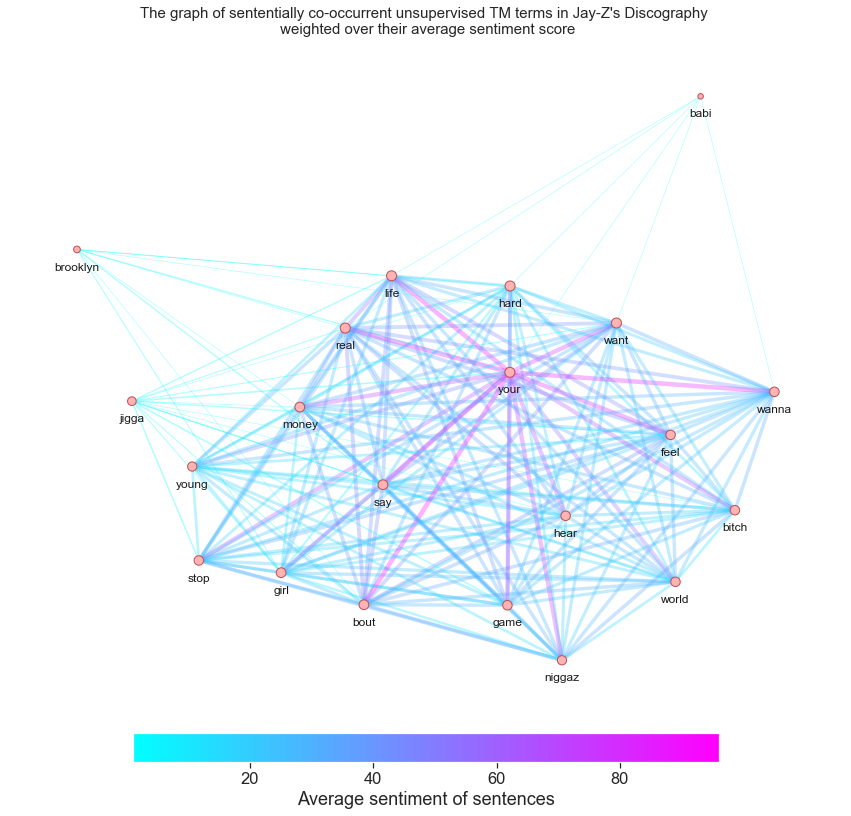

In [71]:
edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()]
edge_width=[math.log(1+w) for w in edge_width]
cmap=plt.cm.cool
weight_list = [ e[2]['weight'] for e in Gw.edges(data=True) ]
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
# width_list=[2*math.log(2+w) for w in weight_list]
width_list=[1.5*math.log(abs(min(weight_list))+2+w) for w in weight_list] #weight_list
nsi=[5*Gw.degree(n) for n in Gw.nodes()]

figsize=(15,15)

pos=graphviz_layout(Gw) 
# pos=nx.spring_layout(Gw)

node_color="#ffb3b3"
node_border_color="r"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(Gw, pos, node_color=node_color,node_size=nsi)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(Gw, pos, edge_color=edge_color,edge_cmap=cmap,vmin=vmin, vmax=vmax,width=edge_width,alpha=0.3)
plt.axis('off');
yoffset = {}
y_off = -5 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gw, yoffset,font_size=12);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='horizontal', shrink=0.7, pad = 0.02)
cbar.set_label('Average sentiment of sentences')
sst="The graph of sententially co-occurrent unsupervised TM terms in %s \n weighted over their average sentiment score" %titlename
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

In [77]:
# names = Gw.nodes()
# names = pd.DataFrame(names)
# names = np.unique(names).tolist()
# df = nx.to_numpy_matrix(Gw,dtype=int)
# A = np.squeeze(np.asarray(df))
# matrix = A.tolist()
# names,matrix = moveElements(names,matrix,"life")
# names,matrix = moveElements(names,matrix,"world")
# names,matrix = moveElements(names,matrix,"bitch")
# names,matrix = moveElements(names,matrix,"young")
# names,matrix = moveElements(names,matrix,"hard")
# names,matrix = moveElements(names,matrix,"your")
# Chord(matrix, names,wrap_labels=False).to_html("chord_jayz.html")

In [78]:
IFrame(src='chord_jayz.html', width=700, height=700)

## 4. Kids See Ghosts (Kanye West and Kid Cudi)

### 4.1 Unsupervised Topic Modeling

In [79]:
titlename = "Kids See Ghost's Discography"

In [80]:
vocabulary = set()
for i in docs_ksg:
    words = tokenize(i)
    vocabulary.update(words)
 
vocabulary = list(vocabulary)
word_index = {w: idx for idx, w in enumerate(vocabulary)}
 
VOCABULARY_SIZE = len(vocabulary)
DOCUMENTS_COUNT = len(docs_ksg)
 
print(VOCABULARY_SIZE, DOCUMENTS_COUNT)

['``', 'down', 'the', 'chimney', ',', 'he', 'will', 'come', 'with', 'his', 'great', 'big', 'smile', 'and', 'youll', 'find', 'that', 'even', 'the', 'kiddies', 'are', 'swingin', 'in', 'the', 'latest', 'style', 'what', 'is', 'santa', 'bringing', '?', 'i', 'wonder', 'whether', 'hell', 'be', 'swingin', "''", 'it', 'feels', 'so', 'good', ',', 'it', 'should', 'cost', 'bought', 'her', 'alligator', ',', 'i', 'aint', 'talkin', 'lacoste', 'made', 'me', 'say', ',', '``', 'ungh', ',', 'uh', "''", 'like', 'im', 'mixing', 'master', 'p', 'and', 'rick', 'ross', '(', 'uh', ',', 'uh', ')', 'she', 'seem', 'to', 'make', 'me', 'always', 'feel', 'like', 'a', 'boss', '(', 'uh', ',', 'uh', ')', 'she', 'said', 'im', 'in', 'the', 'wrong', 'hole', ',', 'i', 'said', 'im', 'lost', '(', 'uh', ',', 'uh', ')', 'she', 'said', 'im', 'goin', 'too', 'fast', ',', 'im', 'exhausted', 'now', 'drop', 'to', 'your', 'knees', 'for', 'the', 'offerin', 'this', 'the', 'theme', 'song', ',', 'oh', 'somethin', 'wrong', 'might', 'need',

In [81]:
excl=[]
# processed_docs = ppdocs #[preprocess(doc) for doc in documents]
processed_docs = [preprocess(doc) for doc in docs_ksg]
processed_docs1=[]
for x in processed_docs:
    y=[]
    for xx in x:
        if xx not in excl:
            y.append(xx)
    processed_docs1.append(y)
processed_docs=processed_docs1
allw=[]
for x in processed_docs:
    for xx in x:
        if xx not in allw:
            allw.append(xx)
print(len(allw)) #All 3586
# processed_docs[:10]

408


In [82]:
allws=[]
for z in processed_docs:
    for zz in z:
        allws.append(zz)
print(len(allws),len(set(allws)))
allwd=Counter(allws)
print(len(allwd))


1131 408
408


In [83]:
dictionary = gensim.corpora.Dictionary(processed_docs)
print(len(dictionary)) #All 3583
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

408
0 adventur
1 aint
2 allig
3 beam
4 bitch
5 boss
6 bring
7 bringin
8 buy
9 catch
10 chimney


In [84]:
dictionary.filter_extremes(no_below=0) #, no_above=0.8) #, keep_n=300) # 5
len(dictionary) 

397

In [85]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
# bow_corpus[43]

In [86]:
# mint = 3  # minimum number of topics
# maxt = 11 # maximum number of topics
# m=30
# X = range(mint,maxt)
# Y = []
# for n in X:
#     ft=[]
#     for j in range(m):
#         lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=n, id2word=dictionary, passes=2, workers=2)
#     #     topics = lda_model.print_topics()
#         sss=[]
#         for idx, topic in lda_model.print_topics(-1):
#             tt=[]
#             s=topic.split(" + ")
#             ss=[]
#             uu=[]
#             for t in s:
#                 u0=float(t.split("*")[0])
#                 u1=t.split("*")[1].replace('"','')
#                 if (u1,u0) not in ss:
#                     ss.append((u1,u0))
#                 if t not in uu:
#                     uu.append(t) 
#             sss.append(ss)
#             topic=" + ".join(uu).encode('utf-8')
#         doms=[]
#         for i in sss:
#             doms.append(i[0][0])
#         fi=len(set(doms))/n
#         ft.append(fi)
#     fis=sum(ft)/m
#     Y.append(fis)
# # print(list(X))
# print(Y)
# nn=[]
# for i,y in enumerate(Y):
#     if y==max(Y): #1:
#         print(Y.index(y))
#         nn.append(i)
# print(nn)
# NT=nn[-1]+mint
# print(NT)

In [87]:
# nt=NT #number_of_topics
nt=3
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=nt, id2word=dictionary, passes=2, workers=2)

In [88]:
topics = lda_model.print_topics() #350  #num_words=25

terms=[]
lt=[]
for i in range(nt):
    for t in topics: 
        lt.append(t[1].split(" + "))
for s in lt:
    for ss in s:
        terms.append(ss[6:])
#         if re.sub(r'[^a-zA-Z]','', ss) not in terms:
#             terms.append(re.sub(r'[^a-zA-Z]','', ss))
terms=[t.replace('"',"") for t in terms]
terms=sorted(set(terms))
print(len(terms))
print(" ")
print("LIST OF UNSUPERVISED TM TERMS:")
print(" ")
for i in terms:
    print(i)

26
 
LIST OF UNSUPERVISED TM TERMS:
 
anymor
brrr
forward
free
ghost
grrrat
guess
heaven
hell
kid
lift
light
lord
movin
nigga
rude
save
shine
spirit
stay
stress
strong
swingin
that
woah
yeah


In [89]:
sss=[]
for idx, topic in lda_model.print_topics(-1):
    tt=[]
    s=topic.split(" + ")
    ss=[]
    uu=[]
    for t in s:
        u0=float(t.split("*")[0])
        u1=t.split("*")[1].replace('"','')
        if (u1,u0) not in ss:
            ss.append((u1,u0))
        if t not in uu:
            uu.append(t) 
    sss.append(ss)
    topic=" + ".join(uu).encode('utf-8')
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: b'0.107*"movin" + 0.106*"forward" + 0.076*"woah" + 0.043*"lord" + 0.037*"save" + 0.024*"light" + 0.024*"shine" + 0.023*"stay" + 0.023*"strong" + 0.016*"stress"'
Topic: 1 
Words: b'0.048*"ghost" + 0.047*"kid" + 0.022*"rude" + 0.019*"brrr" + 0.018*"movin" + 0.017*"grrrat" + 0.014*"spirit" + 0.014*"that" + 0.014*"nigga" + 0.013*"yeah"'
Topic: 2 
Words: b'0.038*"free" + 0.018*"yeah" + 0.015*"guess" + 0.013*"lift" + 0.013*"anymor" + 0.011*"heaven" + 0.010*"swingin" + 0.010*"hell" + 0.008*"ghost" + 0.008*"kid"'


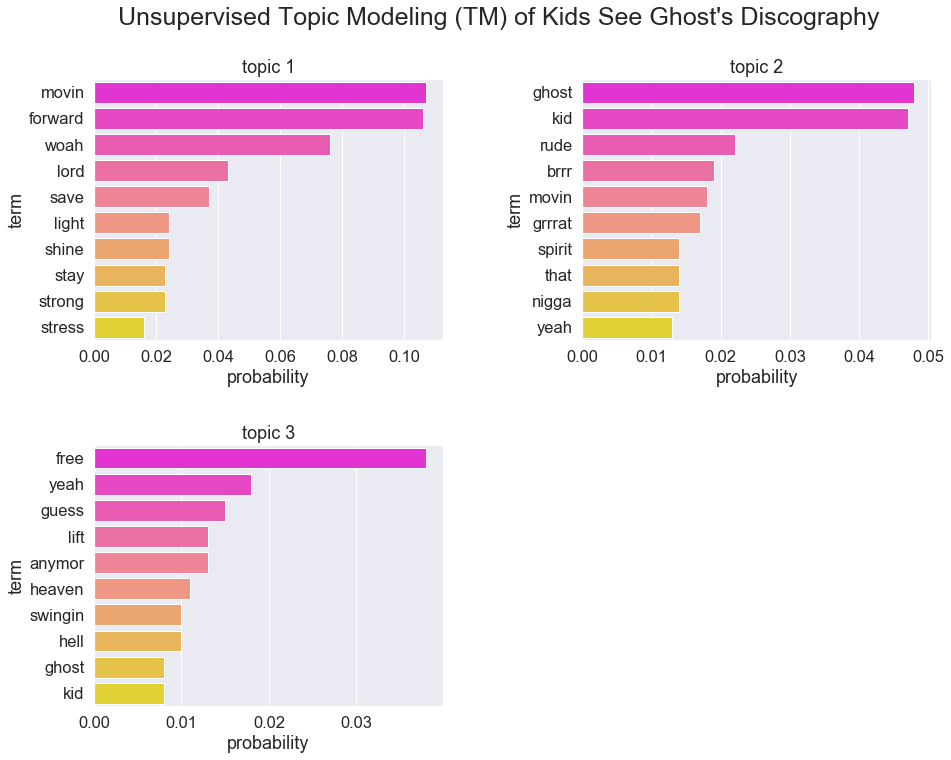

In [90]:
fig=plt.figure(figsize=(15,25)) #figsize=(15,2.4*15*((nt+1)/4))); #15
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(nt):
    sns.set(font_scale = 1.5)
    df=pd.DataFrame(sss[i], columns=['term','prob']).set_index('term')
#     plt.subplot(nt+1,2,i+1); #5
    ax = fig.add_subplot(nt+1,2,i+1)
    plt.title('topic '+str(i+1));
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='spring');
    plt.xlabel('probability');
sst="Unsupervised Topic Modeling (TM) of %s" %titlename
plt.suptitle(sst,fontsize=25, y=0.92);
plt.show()

In [91]:
from pyLDAvis import gensim as pgensim
vis = pgensim.prepare(lda_model,bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.178250  0.003097       1        1  46.529884
1     -0.084399 -0.089137       2        1  27.186131
2     -0.093851  0.086041       3        1  26.283983, topic_info=         Term       Freq      Total Category  logprob  loglift
373   forward  49.000000  49.000000  Default  30.0000  30.0000
170      woah  35.000000  35.000000  Default  29.0000  29.0000
318     movin  55.000000  55.000000  Default  28.0000  28.0000
43        kid  16.000000  16.000000  Default  27.0000  27.0000
27      ghost  17.000000  17.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
94     wonder   1.959760   3.513184   Topic3  -4.8967   0.7525
79   somethin   1.987190   5.693771   Topic3  -4.8828   0.2836
43        kid   2.162523  16.576118   Topic3  -4.7983  -0.7005
27      ghost   2.164917  17.303431   Topic3  -4.7972  -0.7423
191      hate   1.486628   2.814127   Topic3  -5.1730   0.6981

[147 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
250       3  0.723202  anymor
251       3  0.719984    babe
252       3  0.720576    babi
281       2  0.463110    bein
172       2  0.925236    best
...     ...       ...     ...
357       1  0.460892    yall
357       2  0.460892    yall
98        1  0.109313    yeah
98        2  0.327938    yeah
98        3  0.546564    yeah

[157 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

### 4.2 The Network of Sententially Co-Occurrent Terms Derived from Unsupervised Topic Modeling

In [92]:
terms

['anymor',
 'brrr',
 'forward',
 'free',
 'ghost',
 'grrrat',
 'guess',
 'heaven',
 'hell',
 'kid',
 'lift',
 'light',
 'lord',
 'movin',
 'nigga',
 'rude',
 'save',
 'shine',
 'spirit',
 'stay',
 'stress',
 'strong',
 'swingin',
 'that',
 'woah',
 'yeah']

In [93]:
pre=[]
for i in range(len(terms)):
    start=terms[i][:4]
    pre.append(start)
for j,k in Counter(pre).items():
    if k>1:
        print(j)

In [94]:
tdocs=" ".join(docs_ksg)
blob = TextBlob(tdocs)
textSentences = blob.sentences
sendic=dict()
for i,v in enumerate(textSentences):
    sent=v.sentiment.polarity
    wl=[]
    for term in list(set(alias_dict.values())):
        if term in v: 
            wl.append(term)
    if len(wl)>1:
        sendic[i]=wl 
medges=[]
for k,v in sendic.items():
    sent=textSentences[k].sentiment.polarity
    dd={}
    ps=set()
    for j in itertools.combinations(v, 2):
        ps.add(j)
        dd[j]=(k,sent)
    for jj in ps:
        s=0
        ss=0
        for kk,vv in dd.items():
            if kk==jj:
                s+=1
                ss+=vv[1]
        if alias_dict[jj[0]]!=alias_dict[jj[1]]:
            medges.append((alias_dict[jj[0]],alias_dict[jj[1]],"Sentence_"+str(k),ss/float(s)))
print("%s contains %i sentential co-occurrences among %i unsupervized TM terms"%(titlename,len(medges),len(set(alias_dict.values()))))
medges

Kids See Ghost's Discography contains 78 sentential co-occurrences among 21 unsupervized TM terms


[('feel', 'say', 'Sentence_1', 0.02159090909090909),
 ('your', 'say', 'Sentence_1', 0.02159090909090909),
 ('feel', 'your', 'Sentence_1', 0.02159090909090909),
 ('bitch', 'hear', 'Sentence_3', -0.0212121212121212),
 ('your', 'hear', 'Sentence_3', -0.0212121212121212),
 ('bitch', 'world', 'Sentence_3', -0.0212121212121212),
 ('hear', 'world', 'Sentence_3', -0.0212121212121212),
 ('bitch', 'your', 'Sentence_3', -0.0212121212121212),
 ('your', 'world', 'Sentence_3', -0.0212121212121212),
 ('real', 'hear', 'Sentence_3', -0.0212121212121212),
 ('bitch', 'real', 'Sentence_3', -0.0212121212121212),
 ('your', 'real', 'Sentence_3', -0.0212121212121212),
 ('real', 'world', 'Sentence_3', -0.0212121212121212),
 ('your', 'hear', 'Sentence_4', -0.08779761904761905),
 ('feel', 'want', 'Sentence_4', -0.08779761904761905),
 ('hear', 'world', 'Sentence_4', -0.08779761904761905),
 ('your', 'world', 'Sentence_4', -0.08779761904761905),
 ('want', 'hear', 'Sentence_4', -0.08779761904761905),
 ('feel', 'your

In [95]:
medgesd=[]
for e in medges:
    d={}
    d['Sentence']=e[2]
    d['Average sentiment']=e[3]
    medgesd.append((e[0],e[1],d))
    
G = nx.MultiGraph()
G.add_edges_from(medgesd)
for e in G.edges(data=True):
    if e[0]==e[1]:
        G.remove_edge(e[0],e[1])
weight={(x,y):v for (x, y), v in Counter(G.edges()).items()}
w_edges=[(x,y,z) for (x,y),z in weight.items()]
Gw = nx.Graph()
Gw.add_weighted_edges_from(w_edges)

print("The graph of sententially co-occurrent unsupervised TM terms in %s is a weighted graph and \n it has %i nodes and %i edges \n" %(titlename,len(Gw.nodes()),len(Gw.edges())))
out=' '.join([n+"\n" for n in alias_dict.values() if n not in Gw.nodes()])
print("The terms which do not co-occur in sentences are: \n %s" %out)
# print "Graph Gw is a weighted graph with %i nodes and %i edges" %(len(Gw.nodes()),len(Gw.edges()))
print("The density of this graph is %.3f" %nx.density(Gw))
if nx.is_connected(Gw)==True:
    print ("This graph is a connected graph")
else:
    print ("This graph is a disconnected graph and it has",nx.number_connected_components(Gw),"connected components" )   
    giant = max(nx.connected_component_subgraphs(Gw), key=len)
    Gwlcc=Gw.subgraph(giant)
    print ("The largest connected component of this graph is a weighted graph with %i nodes and %i edges" %(len(Gwlcc.nodes()),len(Gwlcc.edges())))
    print ("The density of the largest connected component of this graph is %.3f" %nx.density(Gwlcc))

The graph of sententially co-occurrent unsupervised TM terms in Kids See Ghost's Discography is a weighted graph and 
 it has 14 nodes and 50 edges 

The terms which do not co-occur in sentences are: 
 babi
 brooklyn
 girl
 jigga
 niggaz
 wanna
 young

The density of this graph is 0.549
This graph is a connected graph


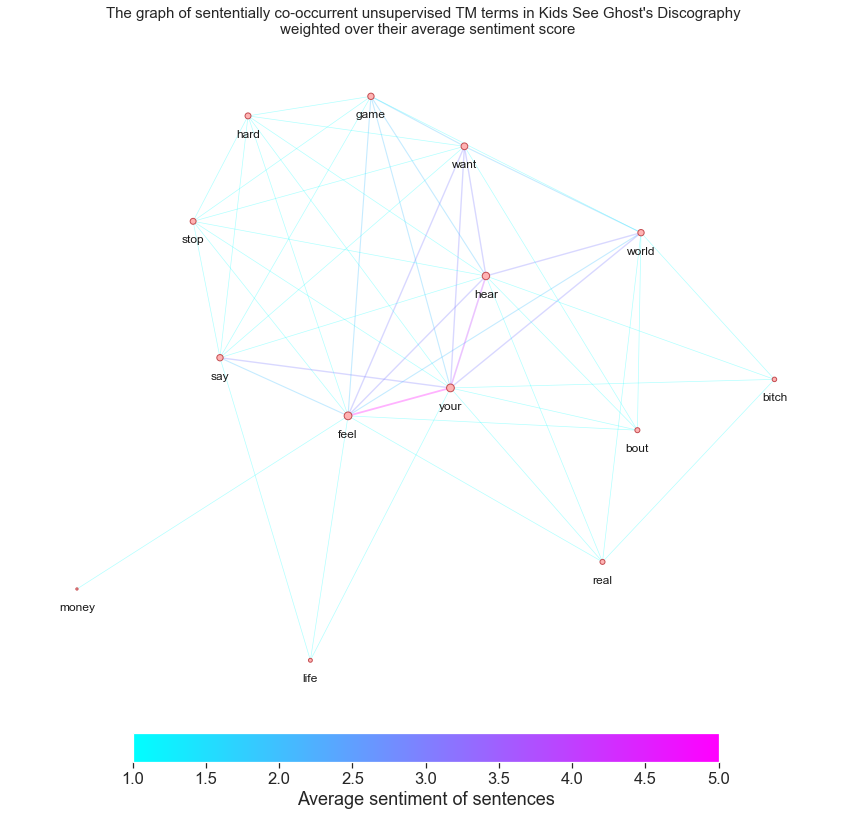

In [96]:
edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()]
edge_width=[math.log(1+w) for w in edge_width]
cmap=plt.cm.cool
weight_list = [ e[2]['weight'] for e in Gw.edges(data=True) ]
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
# width_list=[2*math.log(2+w) for w in weight_list]
width_list=[1.5*math.log(abs(min(weight_list))+2+w) for w in weight_list] #weight_list
nsi=[5*Gw.degree(n) for n in Gw.nodes()]

figsize=(15,15)

pos=graphviz_layout(Gw) 
# pos=nx.spring_layout(Gw)

node_color="#ffb3b3"
node_border_color="r"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(Gw, pos, node_color=node_color,node_size=nsi)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(Gw, pos, edge_color=edge_color,edge_cmap=cmap,vmin=vmin, vmax=vmax,width=edge_width,alpha=0.3)
plt.axis('off');
yoffset = {}
y_off = -5 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gw, yoffset,font_size=12);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='horizontal', shrink=0.7, pad = 0.02)
cbar.set_label('Average sentiment of sentences')
sst="The graph of sententially co-occurrent unsupervised TM terms in %s \n weighted over their average sentiment score" %titlename
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

In [97]:
# names = Gw.nodes()
# names = pd.DataFrame(names)
# names = np.unique(names).tolist()
# df = nx.to_numpy_matrix(Gw,dtype=int)
# A = np.squeeze(np.asarray(df))
# matrix = A.tolist()
# # names,matrix = moveElements(names,matrix,"wave")
# Chord(matrix, names,wrap_labels=False).to_html("chord_ksg.html")

In [98]:
IFrame(src='chord_ksg.html', width=700, height=700)

## 5. The Throne (Kanye West and Jay-Z)

### 5.1 Unsupervised Topic Modeling

In [99]:
titlename = "The Throne's Discography"

In [100]:
vocabulary = set()
for i in docs_throne:
    words = tokenize(i)
    vocabulary.update(words)
 
vocabulary = list(vocabulary)
word_index = {w: idx for idx, w in enumerate(vocabulary)}
 
VOCABULARY_SIZE = len(vocabulary)
DOCUMENTS_COUNT = len(docs_throne)
 
print(VOCABULARY_SIZE, DOCUMENTS_COUNT)

['turn', 'my', 'headphones', 'up', 'louder', 'uh-huh', ',', 'uh-huh', 'what', 'you', 'need', ',', 'what', ',', 'what', 'you', 'need', 'i', 'got', 'what', 'you', 'need', ',', 'what', ',', 'what', 'you', 'need', 'what', 'you', 'need', ',', 'what', ',', 'what', 'you', 'need', '(', 'oh', ')', 'i', 'got', 'what', 'you', 'need', 'ello', ',', 'ello', ',', 'ello', ',', 'hello', 'white', 'america', ',', 'assassinate', 'my', 'character', 'money', 'matrimony', ',', 'yeah', ',', 'they', 'tryna', 'break', 'the', 'marriage', 'up', 'who', 'gon', 'act', 'phony', 'or', 'who', 'gon', 'try', 'to', 'embarrass', 'ya', '?', 'ima', 'need', 'a', 'day', 'off', ',', 'i', 'think', 'ill', 'call', 'ferris', 'up', '(', 'bueller', 'had', 'a', 'mueller', ',', 'but', 'i', 'switched', 'it', 'for', 'a', 'miele', 'cause', 'im', 'richer', ',', 'and', 'prior', 'to', 'this', 'shit', 'was', 'movin', 'freebase', ')', 'had', 'a', 'conference', 'with', 'the', 'djs', '(', 'yeah', ')', ',', 'puerto', 'rico', 'three-days', '(', 'p

In [101]:
excl=[]
# processed_docs = ppdocs #[preprocess(doc) for doc in documents]
processed_docs = [preprocess(doc) for doc in docs_throne]
processed_docs1=[]
for x in processed_docs:
    y=[]
    for xx in x:
        if xx not in excl:
            y.append(xx)
    processed_docs1.append(y)
processed_docs=processed_docs1
allw=[]
for x in processed_docs:
    for xx in x:
        if xx not in allw:
            allw.append(xx)
print(len(allw)) #All 3586
# processed_docs[:10]

1240


In [102]:
allws=[]
for z in processed_docs:
    for zz in z:
        allws.append(zz)
print(len(allws),len(set(allws)))
allwd=Counter(allws)
print(len(allwd))


3391 1240
1240


In [103]:
dictionary = gensim.corpora.Dictionary(processed_docs)
print(len(dictionary)) #All 3583
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

1240
0 aint
1 america
2 assassin
3 bach
4 baller
5 bank
6 black
7 break
8 brooklyn
9 bueller
10 caus


In [104]:
dictionary.filter_extremes(no_below=2) #, no_above=0.8) #, keep_n=300) # 5
len(dictionary) 

317

In [105]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
# bow_corpus[43]

In [106]:
# mint = 3  # minimum number of topics
# maxt = 11 # maximum number of topics
# m=30
# X = range(mint,maxt)
# Y = []
# for n in X:
#     ft=[]
#     for j in range(m):
#         lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=n, id2word=dictionary, passes=2, workers=2)
#     #     topics = lda_model.print_topics()
#         sss=[]
#         for idx, topic in lda_model.print_topics(-1):
#             tt=[]
#             s=topic.split(" + ")
#             ss=[]
#             uu=[]
#             for t in s:
#                 u0=float(t.split("*")[0])
#                 u1=t.split("*")[1].replace('"','')
#                 if (u1,u0) not in ss:
#                     ss.append((u1,u0))
#                 if t not in uu:
#                     uu.append(t) 
#             sss.append(ss)
#             topic=" + ".join(uu).encode('utf-8')
#         doms=[]
#         for i in sss:
#             doms.append(i[0][0])
#         fi=len(set(doms))/n
#         ft.append(fi)
#     fis=sum(ft)/m
#     Y.append(fis)
# # print(list(X))
# print(Y)
# nn=[]
# for i,y in enumerate(Y):
#     if y==max(Y): #1:
#         print(Y.index(y))
#         nn.append(i)
# print(nn)
# NT=nn[-1]+mint
# print(NT)

In [107]:
# nt=NT #number_of_topics
nt=3
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=nt, id2word=dictionary, passes=2, workers=2)

In [108]:
topics = lda_model.print_topics() #350  #num_words=25

terms=[]
lt=[]
for i in range(nt):
    for t in topics: 
        lt.append(t[1].split(" + "))
for s in lt:
    for ss in s:
        terms.append(ss[6:])
#         if re.sub(r'[^a-zA-Z]','', ss) not in terms:
#             terms.append(re.sub(r'[^a-zA-Z]','', ss))
terms=[t.replace('"',"") for t in terms]
terms=sorted(set(terms))
print(len(terms))
print(" ")
print("LIST OF UNSUPERVISED TM TERMS:")
print(" ")
for i in terms:
    print(i)

27
 
LIST OF UNSUPERVISED TM TERMS:
 
america
babi
ball
black
church
feel
fuck
hard
high
home
jesu
king
leav
love
motherfuck
motion
need
peopl
right
slow
star
stop
sweet
thing
wanna
what
wild


In [109]:
sss=[]
for idx, topic in lda_model.print_topics(-1):
    tt=[]
    s=topic.split(" + ")
    ss=[]
    uu=[]
    for t in s:
        u0=float(t.split("*")[0])
        u1=t.split("*")[1].replace('"','')
        if (u1,u0) not in ss:
            ss.append((u1,u0))
        if t not in uu:
            uu.append(t) 
    sss.append(ss)
    topic=" + ".join(uu).encode('utf-8')
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: b'0.035*"fuck" + 0.027*"hard" + 0.023*"motherfuck" + 0.020*"ball" + 0.020*"sweet" + 0.016*"wanna" + 0.014*"motion" + 0.014*"slow" + 0.013*"babi" + 0.013*"right"'
Topic: 1 
Words: b'0.050*"sweet" + 0.027*"jesu" + 0.027*"what" + 0.022*"babi" + 0.021*"right" + 0.018*"king" + 0.016*"america" + 0.016*"church" + 0.015*"wild" + 0.015*"high"'
Topic: 2 
Words: b'0.056*"black" + 0.031*"love" + 0.027*"stop" + 0.026*"need" + 0.015*"peopl" + 0.015*"feel" + 0.011*"thing" + 0.011*"leav" + 0.011*"star" + 0.010*"home"'


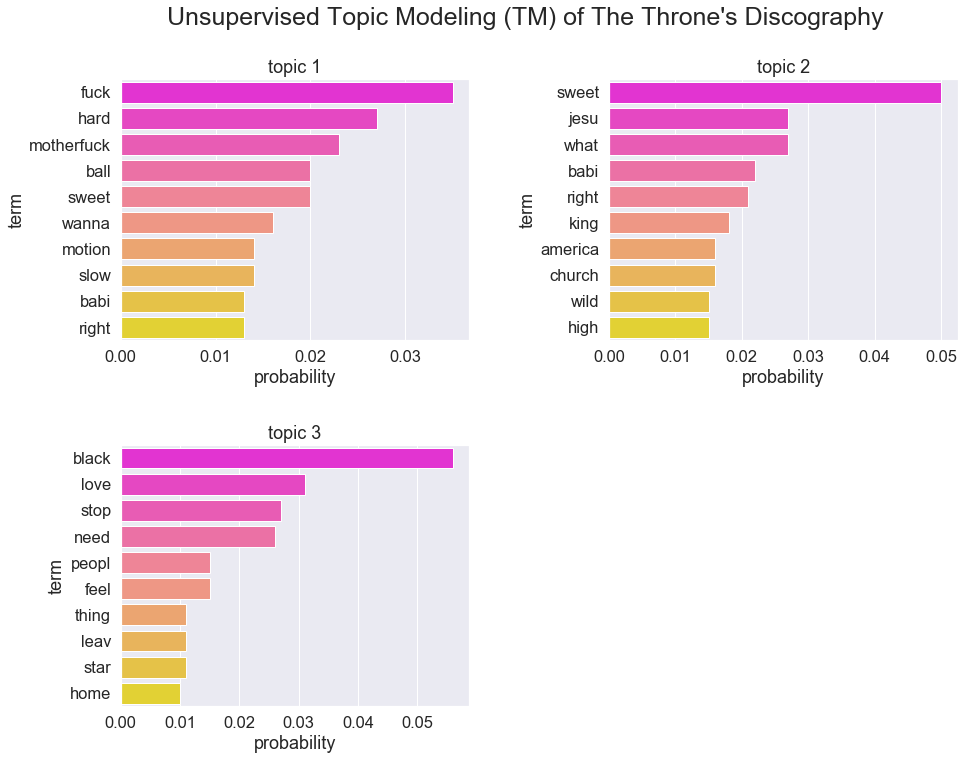

In [110]:
fig=plt.figure(figsize=(15,25)) #figsize=(15,2.4*15*((nt+1)/4))); #15
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(nt):
    sns.set(font_scale = 1.5)
    df=pd.DataFrame(sss[i], columns=['term','prob']).set_index('term')
#     plt.subplot(nt+1,2,i+1); #5
    ax = fig.add_subplot(nt+1,2,i+1)
    plt.title('topic '+str(i+1));
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='spring');
    plt.xlabel('probability');
sst="Unsupervised Topic Modeling (TM) of %s" %titlename
plt.suptitle(sst,fontsize=25, y=0.92);
plt.show()

In [111]:
from pyLDAvis import gensim as pgensim
vis = pgensim.prepare(lda_model,bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.087086 -0.010874       1        1  49.418907
0      0.059802 -0.038247       2        1  31.861767
1      0.027284  0.049122       3        1  18.719328, topic_info=           Term       Freq      Total Category  logprob  loglift
181       sweet  30.000000  30.000000  Default  30.0000  30.0000
183        what  16.000000  16.000000  Default  29.0000  29.0000
161        jesu  18.000000  18.000000  Default  28.0000  28.0000
40         babi  15.000000  15.000000  Default  27.0000  27.0000
2         black  54.000000  54.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
20   motherfuck   2.364893  16.676952   Topic3  -4.9218  -0.2777
53         fuck   2.559560  28.442497   Topic3  -4.8427  -0.7324
2         black   2.565567  54.729858   Topic3  -4.8404  -1.3846
259        hand   2.050901  12.144609   Topic3  -5.0643  -0.1030
92         yall   1.998639  11.569808   Topic3  -5.0901  -0.0803

[179 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
95        1  0.368769     aliv
95        2  0.245846     aliv
95        3  0.368769     aliv
0         1  0.195458  america
0         2  0.390916  america
...     ...       ...      ...
93        3  0.140706    young
234       1  0.836044     your
137       1  0.204229     zero
137       2  0.612686     zero
137       3  0.204229     zero

[287 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

### 5.2 The Network of Sententially Co-Occurrent Terms Derived from Unsupervised Topic Modeling

In [112]:
terms

['america',
 'babi',
 'ball',
 'black',
 'church',
 'feel',
 'fuck',
 'hard',
 'high',
 'home',
 'jesu',
 'king',
 'leav',
 'love',
 'motherfuck',
 'motion',
 'need',
 'peopl',
 'right',
 'slow',
 'star',
 'stop',
 'sweet',
 'thing',
 'wanna',
 'what',
 'wild']

In [113]:
pre=[]
for i in range(len(terms)):
    start=terms[i][:4]
    pre.append(start)
for j,k in Counter(pre).items():
    if k>1:
        print(j)

In [114]:
alias_dict={}
for n in terms:
    alias_dict[n]=n
    
print("The dictionary of aliases has %i keys (names) and %i unique values (aliased proper nouns)" %(len(alias_dict.keys()),len(set(alias_dict.values()))))

The dictionary of aliases has 27 keys (names) and 27 unique values (aliased proper nouns)


In [115]:
tdocs=" ".join(docs_throne)
blob = TextBlob(tdocs)
textSentences = blob.sentences
sendic=dict()
for i,v in enumerate(textSentences):
    sent=v.sentiment.polarity
    wl=[]
    for term in list(set(alias_dict.values())):
        if term in v: 
            wl.append(term)
    if len(wl)>1:
        sendic[i]=wl 
medges=[]
for k,v in sendic.items():
    sent=textSentences[k].sentiment.polarity
    dd={}
    ps=set()
    for j in itertools.combinations(v, 2):
        ps.add(j)
        dd[j]=(k,sent)
    for jj in ps:
        s=0
        ss=0
        for kk,vv in dd.items():
            if kk==jj:
                s+=1
                ss+=vv[1]
        if alias_dict[jj[0]]!=alias_dict[jj[1]]:
            medges.append((alias_dict[jj[0]],alias_dict[jj[1]],"Sentence_"+str(k),ss/float(s)))
print("%s contains %i sentential co-occurrences among %i unsupervized TM terms"%(titlename,len(medges),len(set(alias_dict.values()))))
medges

The Throne's Discography contains 541 sentential co-occurrences among 27 unsupervized TM terms


[('need', 'what', 'Sentence_0', 0.0),
 ('need', 'what', 'Sentence_4', 0.0),
 ('fuck', 'need', 'Sentence_4', 0.0),
 ('what', 'motherfuck', 'Sentence_4', 0.0),
 ('need', 'motherfuck', 'Sentence_4', 0.0),
 ('fuck', 'what', 'Sentence_4', 0.0),
 ('fuck', 'motherfuck', 'Sentence_4', 0.0),
 ('need', 'what', 'Sentence_8', 0.10396825396825396),
 ('king', 'right', 'Sentence_8', 0.10396825396825396),
 ('need', 'right', 'Sentence_8', 0.10396825396825396),
 ('king', 'need', 'Sentence_8', 0.10396825396825396),
 ('feel', 'right', 'Sentence_8', 0.10396825396825396),
 ('feel', 'home', 'Sentence_8', 0.10396825396825396),
 ('what', 'right', 'Sentence_8', 0.10396825396825396),
 ('home', 'what', 'Sentence_8', 0.10396825396825396),
 ('feel', 'what', 'Sentence_8', 0.10396825396825396),
 ('home', 'right', 'Sentence_8', 0.10396825396825396),
 ('home', 'need', 'Sentence_8', 0.10396825396825396),
 ('king', 'home', 'Sentence_8', 0.10396825396825396),
 ('king', 'what', 'Sentence_8', 0.10396825396825396),
 ('feel',

In [116]:
medgesd=[]
for e in medges:
    d={}
    d['Sentence']=e[2]
    d['Average sentiment']=e[3]
    medgesd.append((e[0],e[1],d))
    
G = nx.MultiGraph()
G.add_edges_from(medgesd)
for e in G.edges(data=True):
    if e[0]==e[1]:
        G.remove_edge(e[0],e[1])
weight={(x,y):v for (x, y), v in Counter(G.edges()).items()}
w_edges=[(x,y,z) for (x,y),z in weight.items()]
Gw = nx.Graph()
Gw.add_weighted_edges_from(w_edges)

print("The graph of sententially co-occurrent unsupervised TM terms in %s is a weighted graph and \n it has %i nodes and %i edges \n" %(titlename,len(Gw.nodes()),len(Gw.edges())))
out=' '.join([n+"\n" for n in alias_dict.values() if n not in Gw.nodes()])
print("The terms which do not co-occur in sentences are: \n %s" %out)
# print "Graph Gw is a weighted graph with %i nodes and %i edges" %(len(Gw.nodes()),len(Gw.edges()))
print("The density of this graph is %.3f" %nx.density(Gw))
if nx.is_connected(Gw)==True:
    print ("This graph is a connected graph")
else:
    print ("This graph is a disconnected graph and it has",nx.number_connected_components(Gw),"connected components" )   
    giant = max(nx.connected_component_subgraphs(Gw), key=len)
    Gwlcc=Gw.subgraph(giant)
    print ("The largest connected component of this graph is a weighted graph with %i nodes and %i edges" %(len(Gwlcc.nodes()),len(Gwlcc.edges())))
    print ("The density of the largest connected component of this graph is %.3f" %nx.density(Gwlcc))

The graph of sententially co-occurrent unsupervised TM terms in The Throne's Discography is a weighted graph and 
 it has 24 nodes and 202 edges 

The terms which do not co-occur in sentences are: 
 america
 babi
 jesu

The density of this graph is 0.732
This graph is a connected graph


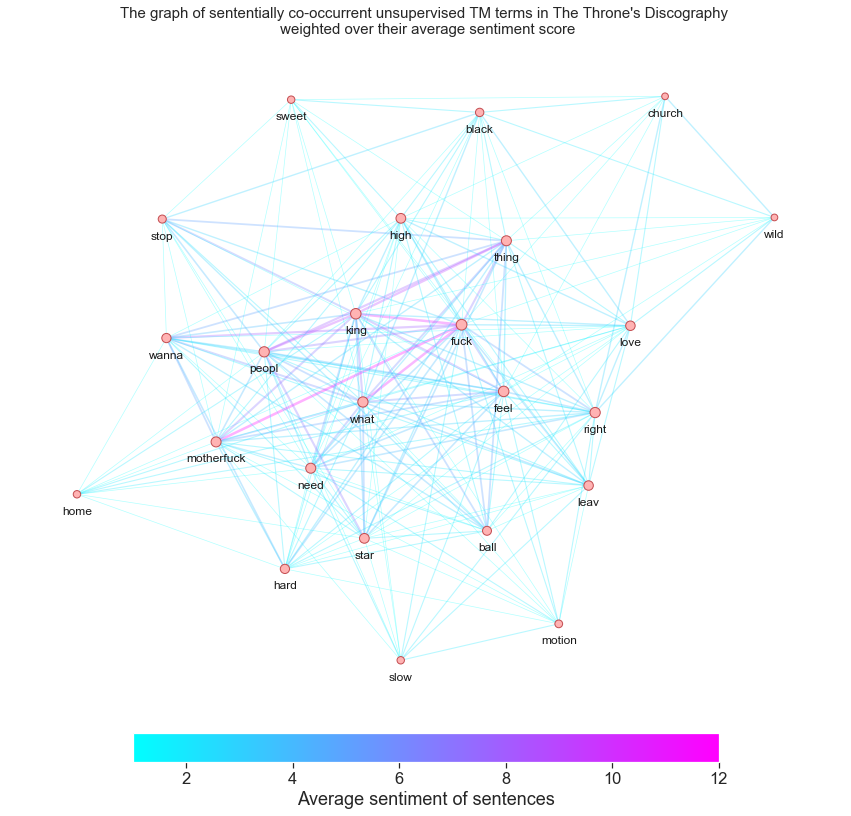

In [117]:
edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()]
edge_width=[math.log(1+w) for w in edge_width]
cmap=plt.cm.cool
weight_list = [ e[2]['weight'] for e in Gw.edges(data=True) ]
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
# width_list=[2*math.log(2+w) for w in weight_list]
width_list=[1.5*math.log(abs(min(weight_list))+2+w) for w in weight_list] #weight_list
nsi=[5*Gw.degree(n) for n in Gw.nodes()]

figsize=(15,15)

pos=graphviz_layout(Gw) 
# pos=nx.spring_layout(Gw)

node_color="#ffb3b3"
node_border_color="r"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(Gw, pos, node_color=node_color,node_size=nsi)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(Gw, pos, edge_color=edge_color,edge_cmap=cmap,vmin=vmin, vmax=vmax,width=edge_width,alpha=0.3)
plt.axis('off');
yoffset = {}
y_off = -5 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gw, yoffset,font_size=12);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='horizontal', shrink=0.7, pad = 0.02)
cbar.set_label('Average sentiment of sentences')
sst="The graph of sententially co-occurrent unsupervised TM terms in %s \n weighted over their average sentiment score" %titlename
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

In [118]:
# names = Gw.nodes()
# names = pd.DataFrame(names)
# names = np.unique(names).tolist()
# df = nx.to_numpy_matrix(Gw,dtype=int)
# A = np.squeeze(np.asarray(df))
# matrix = A.tolist()
# Chord(matrix, names,wrap_labels=False).to_html("chord_throne.html")

In [120]:
IFrame(src='chord_throne.html', width=700, height=700)